# Librerías en Python para ciencia de datos

# Tu reto en esta unidad

Después de presentarte el lenguaje Python en la unidad anterior, en esta unidad vamos a explorar algunas de las principales librerías disponibles para ayudarnos en varias tareas de la ciencia de datos.

Aunque de nuevo la extensión te parezca larga, ¡no temas! No hay teoría compleja, los conceptos de análisis estádistico los conoces ya de las unidades anteriores. El objetivo es darte una visión global de Python y su uso en ciencia de datos, no que te conviertas en un experto gurú.


# Introducción

En esta segunda unidad de la serie dedicada a Python, vamos a visitar algunas de las principales librerías de terceros creadas para facilitar la vida de los usuarios científicos en tareas como el cálculo, manipulación de datos, visualización y modelado estadístico.

Además de las librerías que vamos a presentarte, existen numerosas librerías adicionales alternativas para cálculo científico, visualización gráfica de datos o *machine learning*. También hay librerías especializadas en áreas muy concretas, como el análisis semántico de textos y análisis de sentimiento, redes neuronales, análisis de grafos o *deep learning*. Te animamos a que profundices y explores estas alternativas.


# Cálculo científico en Python: NumPy

Como has visto hasta aquí, Python es un lenguaje de programación que auna sencillez y expresividad, que facilitan su aprendizaje y uso, con una gran potencia y flexibilidad para desarrollar programas y sistemas complejos para resolver problemas complicados. Estas características han atraído desde un principio a usuarios de la comunidad científica, interesados en aprovechar Python como lenguaje y herramienta básica para su trabajo.

Sin embargo, Python no fue diseñado originalmente para integrar y dar soporte nativo para tareas básicas de cálculo numérico y científico, como operaciones con vectores y matrices. Para paliar esta carencia, la comunidad ha ido desarrollando diferentes librerías de cálculo con las que extender las capacidades del lenguaje. NumPy (_Numeric Python_) es actualmente la librería de computación científica más extendida en Python, ofreciendo múltiples tipos de datos y funciones para álgebra lineal y cálculo vectorial y matricial.

Veamos un caso sencillo. Supongamos que estamos haciendo un estudio de alimentación y tenemos que calcular el índice de masa corporal de varias personas que participan en nuestro estudio. El índice de masa corporal se define como

$$ IMC = \frac{masa}{{altura}^2} $$

Tenemos una lista con las alturas y otra con el peso que hemos medido para cada persona. ¿Cómo calcularías el IMC?

In [1]:
# Arrays con alturas y masa de los participantes
altura = [ 1.67, 1.73, 1.76, 1.85, 1.77, 1.73 ]
masa = [ 65.0, 79.2, 76.7, 82.0, 72.5, 66.1 ]

In [2]:
# Si intentamos operar con las listas directamente, no funcionará
masa / (altura ** 2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [3]:
# La primera idea sería iterar los valores en un bucle
imc = []
for i in range(len(altura)):
    a = altura[i]
    m = masa[i]
    imc.append(m/(a**2))

print(imc)

[23.306680053067517, 26.46262822012095, 24.76110537190083, 23.959094229364496, 23.14149829231702, 22.085602592802964]


In [4]:
# Podríamos usar map() para aplicar la operación a los dos arrays
list( map(lambda m,a : m/(a**2), masa, altura) )

[23.306680053067517,
 26.46262822012095,
 24.76110537190083,
 23.959094229364496,
 23.14149829231702,
 22.085602592802964]

In [5]:
# Cuando hay que emparejar valores de listas distintas para formar tuplas
# también podemos usar la función zip()
[ m/(a**2) for m,a in zip(masa, altura) ]

[23.306680053067517,
 26.46262822012095,
 24.76110537190083,
 23.959094229364496,
 23.14149829231702,
 22.085602592802964]

La librería Numpy nos permite hacer esto de una forma mucho más simple.

In [6]:
# Cargamos la librería
import numpy as np

# Definimos los dos arrays o vectores
valtura = np.array([ 1.67, 1.73, 1.76, 1.85, 1.77, 1.73 ])
vmasa = np.array([ 65.0, 79.2, 76.7, 82.0, 72.5, 66.1 ])

# Y calculamos normalmente como con cualquier otro tipo numérico
vmasa / (valtura ** 2)


array([23.30668005, 26.46262822, 24.76110537, 23.95909423, 23.14149829,
       22.08560259])

Mucho más conciso y fácil de entender, ¿no crees? Simplemente hemos creado dos vectores con Numpy para almacenar las alturas y pesos, y después realizamos las operaciones directamente sobre ellos.

### _Arrays_

El tipo básico para trabajar en NumPy es el _array_. Estos objetos representan vectores o matrices multidimensionales, en las que todos los elementos son del mismo tipo, en general numérico.

En el ejemplo anterior ya hemos visto cómo crear un nuevo array utilizando una lista de valores. De esta forma, definimos un array de dimensión 1, es decir, un vector. Sigamos con otro ejemplo sencillo.


In [7]:
# Un vector (dimensión 1) con tres elementos
v_1d = np.array([1, 2, 3])

In [8]:
# Número de dimensiones del array
print(v_1d.ndim)        # 1

1


In [9]:
# Número de elementos en cada dimensión del array
print(v_1d.shape)       # (3,)

(3,)


In [10]:
# Número total de elementos del array
print(v_1d.size)        # 3

3


In [11]:
# Tipo de los elementos
print(v_1d.dtype)       # int64 (enteros)

int32


In [12]:
# Ahora vamos a crear una matriz
# utilizando listas anidadas
m_2d = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

# Veamos el contenido
print(m_2d)             # [[1 2 3]
                        #  [4 5 6]]

[[1. 2. 3.]
 [4. 5. 6.]]


In [13]:
# Es un array de 2 dimensiones (una matriz)
print(m_2d.ndim)        # 2

2


In [14]:
# El primer eje o dimensión tiene tamaño 2 (filas)
# El segundo eje o dimensión tiene tamaño 3 (columnas)
print(m_2d.shape)       # (2, 3)

(2, 3)


In [15]:
# Número total de elementos del array
print(m_2d.size)        # 6

6


In [16]:
# Tipo de los elementos
print(m_2d.dtype)       # float64 (coma flotante)

float64


In [17]:
# También podemos indicar el tipo de los elementos
# al crear el array, con el argumento 'dtype'
np.array([[1, 2, 3], [4, 5, 6]], dtype='float64')

array([[1., 2., 3.],
       [4., 5., 6.]])

En este código hemos creado un vector unidimensional (`v_1d`) y una matriz bidimensional (`m_2d`). En el segundo caso, lo hacemos pasando una lista de listas. En general, cuando usamos esta forma de construir un array, pasando una secuencia de elementos, el nivel de anidación determinará el número de dimensiones que tenga el array.

Además, vemos cómo hacer para consultar algunas propiedades de un array, como el número de dimensiones, la forma o tamaño de las dimensiones, el número de elementos o su tipo. También habrás visto en el último ejemplo cómo indicar el tipo de los elementos al crear el array.

Sigamos con más formas de crear arrays especificando sucesiones de elementos con `np.arange()` y `np.linspace()`

In [18]:
# La función np.arange() es similar al "range()" normal
# pero crea arrays en lugar de listas
m1 = np.arange(15)
print(m1)                   # [ 0  1  2 ..., 12 13 14]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [19]:
# Al igual que range(), se puede indicar 
# el limite inicial, final y el tamaño del paso
m2 = np.arange(1, 10, 2)
print(m2)                   # [1 3 5 7 9]

[1 3 5 7 9]


In [20]:
# Si queremos crear un array dividiendo un intervalo
# en N elementos equiespaciados, podemos usar np.linspace()
m3 = np.linspace(0, 10, 5)  # Genera 5 núms entre 0 y 10 (ambos incluidos)
print(m3)                   # [  0.    2.5   5.    7.5  10. ]

[ 0.   2.5  5.   7.5 10. ]


Si recuerdas la función `range()` que hemos utilizado múltiples veces para generar secuencias, notarás que la función `np.arange()` es prácticamente idéntica, solo que crea objetos de tipo `ndarray` (que es el tipo de los arrays en NumPy).

La función `np.linspace()` es un poco distinta, porque en lugar de darle el tamaño del _paso_, lo que hace es generar un número dado de valores igualmente espaciados entre los dos límites que le indicas (incluyendo ambos en el resultado).

Al operar con vectores y matrices, será habitual que tengamos que utilizar construcciones especiales, como matrices unidad, o arrays con todos los elementos cero o iguales... NumPy incluye varias funciones muy prácticas para crear estos tipos de arrays más comunes.


In [21]:
# Crear un vector con 5 ceros
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [22]:
# Crear una matriz 2x3 de ceros
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
# Crear una matriz 2x3 de unos
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [24]:
# Crear una matrix 2x3 rellenada con el mismo valor (99) 
# para todos los elementos
np.full((2,3), 99)

array([[99, 99, 99],
       [99, 99, 99]])

In [25]:
# Crear una matriz identidad 3x3
# (1 en la diagonal, 0 en el resto)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

También podemos crear arrays con valores generados aleatoriamente a partir de distintas distribuciones de probabilidad.

In [26]:
# Fijamos la semilla aleatoria (por reproducibilidad)
np.random.seed(42)

In [27]:
# Crear una matrix 2x3
# rellenada con numeros aleatorios en [0, 1)
np.random.random((2,3))

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

In [28]:
# Distribución uniforme en [a, b)
np.random.uniform(0, 10, size=(2,3))

array([[0.58083612, 8.66176146, 6.01115012],
       [7.08072578, 0.20584494, 9.69909852]])

In [29]:
# Distribución normal (media=0, desv.tipica=1)
np.random.normal(0, 1, size=(2,3))

array([[-0.46947439,  0.54256004, -0.46341769],
       [-0.46572975,  0.24196227, -1.91328024]])

In [30]:
# Muestrear un array
vbase = np.arange(10)
# con reemplazo (permitiendo valores replicados)
np.random.choice(vbase, size=8, replace=True)

array([8, 0, 9, 2, 6, 3, 8, 2])

In [31]:
# sin reemplazo (cada valor solo puede aparecer una vez)
np.random.choice(vbase, size=8, replace=False)

array([8, 7, 5, 3, 1, 0, 9, 6])

### Indexado e iteración

Podemos seleccionar elementos individuales o rebanadas de un array de forma similar a como lo hacemos con las listas u otras secuencias en Python. La principal diferencia está en cómo seleccionar elementos en arrays de 2 o más dimensiones.

Para empezar, podemos seleccionar elementos indicando su posición en el array. Al igual que con las listas, al primer elemento de cada dimensión se accede con el índice de posición cero. Si una dimensión tiene N elementos, el último estará en la posición (N - 1).

> **¡Cuidado!** No confundas el número de dimensiones con el tamaño o número de elementos en cada dimensión del array.

In [32]:
# Un array de dimensión 1 (vector)
v1 = np.arange(0, 50, 5)
print(v1)

[ 0  5 10 15 20 25 30 35 40 45]


In [33]:
# Podemos seleccionar un elemento individual
v1[2]                         # 10

10

In [34]:
# O seleccionar varios a la vez, 
# usando una lista de las posiciones que queremos
v1[[1, 4, 8]]                 # array([ 5, 20, 40])

array([ 5, 20, 40])

In [35]:
# Ahora con una matriz 3x4
# Fíjate que usamos la función range() normal
# para pasar las listas que necesitamos
# al inicializar el array
m2 = np.array([range(0,4), range(4,8), range(8,12)])
print(m2)                    # [[ 0  1  2  3]
                             #  [ 4  5  6  7]
                             #  [ 8  9 10 11]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [36]:
# Seleccionamos un elemento
# indicando la fila (2) y la columna (3)
m2[2, 3]                     # 11

11

In [37]:
# Seleccionamos los elementos en las filas 1 y 2
# Fíjate que usamos ':' para indicar que queremos
# todos los elementos en la dimensión 2 (columnas)
m2[[1,2], :]                 # array([[ 4,  5,  6,  7],
                             #        [ 8,  9, 10, 11]])

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
# Seleccionamos los elementos
# de la fila 1 en las columnas 2 y 3
m2[1, [2,3]]                 # array([6, 7])

array([6, 7])

Cuando tenemos un array de 2 o más dimensiones, debemos incluir entre los corchetes la selección de elementos para cada dimensión, separándolas con comas (p.ej. `m2[2, 3]`). Si en una dimensión queremos seleccionar _todos_ los elementos, utilizamos los dos puntos (`:`).

En realidad, los dos puntos sirven para indicar una _"rebanada"_ de elementos en un eje, igual que hacemos con cualquier secuencia en Python. También podemos seleccionar _"rebanadas"_ en cualquiera de las dimensiones o ejes de un array, indicando la posición inicial y final que queremos.


In [39]:
# Seleccionamos la fila 0
m2[0, :]                    # array([0, 1, 2, 3])

array([0, 1, 2, 3])

In [40]:
# Seleccionamos la columna 1
m2[:, 1]                    # array([1, 5, 9])

array([1, 5, 9])

In [41]:
# Seleccionamos los elementos que están entre
# la fila 1 y la 3 (no incluida)
# y entre la columna 1 y la 3 (no incluida)
m2[1:3, 1:3]                # array([[ 5,  6],
                            #        [ 9, 10]])

array([[ 5,  6],
       [ 9, 10]])

También podemos utilizar una máscara booleana para seleccionar elementos. Esto es útil para poder filtrar aquellos valores que cumplen una determinada condición. Veamos cómo.


In [42]:
# Para cada elemento del array, comprobamos si es par o no
mascara_pares = (m2 % 2 == 0)
print(mascara_pares)        # [[ True False  True False]
                            #  [ True False  True False]
                            #  [ True False  True False]]

[[ True False  True False]
 [ True False  True False]
 [ True False  True False]]


In [43]:
# Ahora usamos la mascara para seleccionar los elementos
m2[mascara_pares]           # array([ 0,  2,  4,  6,  8, 10])

array([ 0,  2,  4,  6,  8, 10])

In [44]:
# Naturalmente, podemos hacerlo todo en una sola expresión
m2[m2 % 2 == 0]             # array([ 0,  2,  4,  6,  8, 10])

array([ 0,  2,  4,  6,  8, 10])

Fíjate que cuando indexamos con una máscara booleana, obtenemos un array unidimensional con los elementos seleccionados, no se conserva la estructura del array original.



### Manipulando _arrays_

Es posible generar nuevos arrays modificando o combinando arrays existentes. Podemos crear un array multidimensional a partir de un vector mediante la función `reshape()`, o podemos _aplanar_ el array multidimensional para obtener un vector usando la función `flatten()`.

In [45]:
# Partimos de un vector (array 1d)
v = np.arange(15)
print(v)                    # [ 0  1  2 ..., 12 13 14]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [46]:
# Creamos una matriz (3x5) usando reshape()
m = v.reshape(3, 5)
print(m)                    # [[ 0  1  2  3  4]
                            #  [ 5  6  7  8  9]
                            #  [10 11 12 13 14]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [47]:
# Podemos obtener un nuevo vector
# "aplanando" todos elementos de la matriz,
# recorriendo fila tras fila
v2 = m.flatten()
print(v2)                   # [ 0  1  2 ..., 12 13 14]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [48]:
# También podemos "aplanar" la matriz
# recorriendo columna tras columna
# usando el modificador "F"
v2c = m.flatten("F")
print(v2c)                  # [ 0  5 10 ...,  4  9 14]

[ 0  5 10  1  6 11  2  7 12  3  8 13  4  9 14]


Tanto `reshape()` como `flatten()` devuelven un array nuevo copiando los datos, no modifican el array original. Y si te preguntas el porqué de usar `"F"` como modificador de `flatten()`, viene del lenguaje de programación _Fortran_, que almacena y opera las matrices columna a columna.

Una operación típica con matrices es la trasposición, reflejando los elementos a lo largo de su diagonal.

In [49]:
m = np.arange(15).reshape(3, 5)
print(m)                    # [[ 0  1  2  3  4]
                            #  [ 5  6  7  8  9]
                            #  [10 11 12 13 14]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [50]:
# Trasponemos la matriz usando el método T
# Fijate que no necesita paréntesis
m.T                        # array([[ 0,  5, 10],
                           #        [ 1,  6, 11],
                           #        [ 2,  7, 12],
                           #        [ 3,  8, 13],
                           #        [ 4,  9, 14]])

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

También podemos concatenar o _apilar_ arrays en diferentes ejes.

In [51]:
m1 = np.arange(0,6).reshape(2, 3)
m2 = np.arange(10,16).reshape(2, 3)

# Apilar verticalmente dos arrays
np.vstack((m1, m2))        # array([[ 0,  1,  2],
                           #        [ 3,  4,  5],
                           #        [10, 11, 12],
                           #        [13, 14, 15]])

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [10, 11, 12],
       [13, 14, 15]])

In [52]:
# Apilar horizontalmente dos arrays
np.hstack((m1, m2))        # array([[ 0,  1,  2, 10, 11, 12],
                           #        [ 3,  4,  5, 13, 14, 15]])

array([[ 0,  1,  2, 10, 11, 12],
       [ 3,  4,  5, 13, 14, 15]])

In [53]:
# Podemos añadir una fila (array 1d) al final de un array 2d
fila = np.array([30, 40, 60])
np.vstack((m1, fila))      # array([[ 0,  1,  2],
                           #        [ 3,  4,  5],
                           #        [30, 40, 60]])

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [30, 40, 60]])

In [54]:
# Si queremos añadir una columna (array 1d) a un array 2d,
# usamos la funcion np.column_stack()
columna = np.array([100, 200])
np.column_stack((m1, columna))   # array([[  0,   1,   2, 100],
                                 #        [  3,   4,   5, 200]])

array([[  0,   1,   2, 100],
       [  3,   4,   5, 200]])

> **Importante** A la hora de concatenar arrays asegúrate de que las dimensiones tienen tamaños compatibles. Por ejemplo, con una matriz de F filas por C columnas, una nueva fila deberá tener C elementos, y una nueva columna deberá tener F elementos.

Igual que concatenamos arrays, podemos partir un array en trozos. Para ello tenemos las funciones `np.vsplit()` y `np.hsplit()`. Ambas funciones devuelven una lista con los _subarrays_ resultado de la división.

In [55]:
m_grande = np.arange(12).reshape(3, 4)
print(m_grande)                # [[ 0  1  2  3]
                               #  [ 4  5  6  7]
                               #  [ 8  9 10 11]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [56]:
# Dividimos el array horizontalmente en 2 trozos
divh = np.hsplit(m_grande, 2)
# El resultado es una lista, veamos el primer trozo
print(divh[0])                 # [[ 0,  1],
                               #  [ 4,  5],
                               #  [ 8,  9]])

[[0 1]
 [4 5]
 [8 9]]


In [57]:
# y el segundo
print(divh[1])                 # [[ 2  3]
                               #  [ 6  7]
                               #  [10 11]]

[[ 2  3]
 [ 6  7]
 [10 11]]


In [58]:
# Ahora dividimos verticalmente.
# No podemos dividir en 2 porque hay 3 filas.
# Pero podemos indicar los puntos de division con una tupla.
divv = np.vsplit(m_grande, (1,))
print(divv[0])                 # [[0 1 2 3]]

[[0 1 2 3]]


In [59]:
print(divv[1])                 # [[ 4  5  6  7]
                               #  [ 8  9 10 11]]

[[ 4  5  6  7]
 [ 8  9 10 11]]


Como ves, ambas funciones pueden usarse de dos formas. En la primera, indicamos el _número de particiones_ que queremos obtener. Es este caso, es necesario que el número de filas (con `np.vsplit()`) o de columnas (con `np.hsplit()`) sea divisible por el número de porciones que queremos. Los trozos resultantes deben tener el mismo tamaño, o de lo contrario se producirá un error.

En la segunda forma, pasamos como argumento una tupla con los _puntos de corte_ por donde queremos dividir, ya sea en filas o el columnas. En el ejemplo, queremos cortar por un único punto (fila en este caso), por lo que usamos una tupla con un único elemento. Si recuerdas lo que aprendimos sobre las tuplas, para definir una tupla de un solo elemento debemos añadir una coma justo detrás del valor (así Python lo puede distinguir de otras expresiones que también usan paréntesis).


### Operando con _arrays_

#### Asignaciones

Ahora que hemos visto cómo crear y manipular arrays, pasemos a operar con su contenido. Comencemos por modificar valores del array, usando el operador de asignación habitual.

In [60]:
m = np.arange(12).reshape(3, 4)
print(m)                # [[ 0  1  2  3]
                        #  [ 4  5  6  7]
                        #  [ 8  9 10 11]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [61]:
# Cambiar un elemento particular
m[0, 0] = 100
print(m)                # [[ 100  1  2  3]
                        #  [   4  5  6  7]
                        #  [   8  9 10 11]]

[[100   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]]


In [62]:
# Podemos cambiar una "rebanada" con una lista de valores
# Ej. de la fila 1, desde la columna 1 hasta el final
#     (3 elementos)
m[1, 1:] = [50, 60, 70]
print(m)                # [[ 100   1   2   3]
                        #  [   4  50  60  70]
                        #  [   8   9  10  11]]

[[100   1   2   3]
 [  4  50  60  70]
 [  8   9  10  11]]


In [63]:
# O cambiar todos los elementos seleccionados
# con un único valor
# Ej. desde la fila 1 hasta el final 
#     y la columna 2 hasta el final
m[1:, 2:] = 0
print(m)                # [[100   1   2   3]
                        #  [  4  50   0   0]
                        #  [  8   9   0   0]]

[[100   1   2   3]
 [  4  50   0   0]
 [  8   9   0   0]]


#### Operaciones matemáticas

Como te hemos adelantado en el ejemplo inicial, una de las caracterísiticas claves que hace tan útil y potente a la librería NumPy es su habilidad para realizar operaciones directamente sobre arrays de datos de forma sencilla y eficiente. Los operadores matemáticos habituales pueden utilizarse con arrays directamente. Podemos operar con dos arrays, o bien con un array y un escalar. En ambos casos, las operaciones se realizan elemento a elemento.


In [64]:
v1 = np.array([2,5])
v2 = np.array([3,3])

m1 = np.array([1,2,3,4]).reshape(2,2)
m2 = np.array([3,5,7,11]).reshape(2,2)

In [65]:
# Podemos sumar un escalar a todos los elementos de un array
print( v1 + 3 )                        # [5 8]

[5 8]


In [66]:
print( m1 + 5 )                        # [[6 7]
                                       #  [8 9]]

[[6 7]
 [8 9]]


In [67]:
# O sumar dos arrays elemento a elemento
print( m1 + m2 )                       # [[ 4  7]

                                       #  [10 15]]

[[ 4  7]
 [10 15]]


In [68]:
# Resta de arrays
print( m2 - m1 )                       # [[2 3]
                                       #  [4 7]]

[[2 3]
 [4 7]]


In [69]:
# Multiplicación con escalar
# (no confundir con producto escalar de vectores/matrices)
m10 = 10 * m1
print(m10)                             # [[10 20]
                                       #  [30 40]]

[[10 20]
 [30 40]]


In [70]:
# Multiplicación de arrays
print(v1 * v2)                         # [ 6 15]

[ 6 15]


In [71]:
print(m1 * m2)                         # [[ 3 10]
                                       #  [21 44]]

[[ 3 10]
 [21 44]]


In [72]:
# División
print( m10 / m1 )                      # [[ 10.  10.]
                                       #  [ 10.  10.]]

[[10. 10.]
 [10. 10.]]


Fíjate que al aplicar estas operaciones elemento a elemento con dos arrays, ambos deben tener dimensiones de tamaño compatible. Es decir, vectores o matrices que tengan el mismo número de elementos en cada eje o dimensión.

No obstante, es posible combinar en estas operaciones dos arrays que tengan distinto número de dimensiones (por ejemplo, una matriz y un vector), siempre que la dimensión del menor tenga un tamaño compatible con el array de más dimensiones. Con un ejemplo seguro que queda más claro.


In [73]:
# array 1d: vector de dos elementos
v1 = np.array([2,5])

# array 1d: vector de tres elementos
v3 = np.array([3,3,3])

m1 = np.array([1,2,3,4]).reshape(2,2)     # array 2d: matriz 2x2
print(m1)                                 # [[1 2]
                                          #  [3 4]]

[[1 2]
 [3 4]]


In [74]:
# Multiplicar matriz (2d) por vector (1d)
# elemento a elemento
# Los tamaños de las dimensiones (matriz 2x2 y vector de tamaño 2)
# son compatibles
print( m1 * v1 )                          # [[ 2 10]
                                          #  [ 6 20]]

[[ 2 10]
 [ 6 20]]


In [75]:
# Es como si tuviéramos el vector v1 "apilado" dos veces...
mv1 = np.vstack((v1, v1))
print(mv1)                                # [[2 5]
                                          #  [2 5]]

[[2 5]
 [2 5]]


In [76]:
# ... y multiplicásemos las dos matrices
print( m1 * mv1 )                         # [[ 2 10]
                                          #  [ 6 20]]

[[ 2 10]
 [ 6 20]]


In [77]:
# Sin embargo, si mezclamos arrays con distinto número de dimensiones
# pero con tamaños no compatibles, se producirá un error
print( m1 * v3 )

# ValueError: operands could not be broadcast together with shapes (2,2) (3,) 

ValueError: operands could not be broadcast together with shapes (2,2) (3,) 

Cuando mezclamos dos arrays con diferente número de dimensiones en operaciones elemento a elemento, NumPy automáticamente toma el array de dimensión menor y replica la operación con cada dimensión del array mayor, como si fuera un bucle. 

Es equivalente a tomar el array menor y _extrusionar_ o _apilar_ sus valores a lo largo del eje que falte, hasta obtener un array compatible con el de dimensión mayor. Este mecanismo es conocido como _propagación_ o _broadcasting_.

Para que funcione, el tamaño del array de dimensión menor sigue teniendo que ser compatible con el mayor. En el último caso del ejemplo anterior, el vector `v3` tiene tamaño 3. Al aplicar el _broadcasting_, el último elemento de `v3` no tiene un par correspondiente en la matriz `m1`, así que no es posible aplicar la operación elemento a elemento.

Además de todos los operadores que has visto, con NumPy también tenemos disponibles múltiples funciones matemáticas universales para aplicarlas sobre arrays. Veamos algunas.

In [78]:
# Raíz cuadrada
print( np.sqrt(m1) )

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [79]:
# Funciones trigonométricas: 
# Seno, coseno, tangente...
print( np.sin(m1) )

[[ 0.84147098  0.90929743]
 [ 0.14112001 -0.7568025 ]]


In [80]:
print( np.cos(m1) )

[[ 0.54030231 -0.41614684]
 [-0.9899925  -0.65364362]]


In [81]:
print( np.tan(m1) )

[[ 1.55740772 -2.18503986]
 [-0.14254654  1.15782128]]


In [82]:
# Logaritmo
print( np.log(m1) )

[[0.         0.69314718]
 [1.09861229 1.38629436]]


In [83]:
# Exponencial (e^x)
print( np.exp(m1) )

[[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]


Consulta la lista completa de funciones disponibles en https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

#### Operaciones de agregación y estadísticas

NumPy nos permite calcular valores agregados o estadísticos sobre un array, como la suma de sus elementos o la media. Podemos realizar estas operaciones tomando todos los elementos del array, o agregar en un determinado eje o dimensión (por ejemplo, por filas o columnas en una matriz).

In [84]:
# Creamos una matriz
m3 = np.arange(1,10).reshape(3,3)
print(m3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [85]:
# Suma de todos los elementos del array
np.sum(m3)

45

In [86]:
# Suma de los elementos de cada columna
np.sum(m3, axis = 0)

array([12, 15, 18])

In [87]:
# Suma de los elementos de cada fila
np.sum(m3, axis = 1)

array([ 6, 15, 24])

In [88]:
# Media
np.mean(m3)

5.0

In [89]:
np.mean(m3, axis = 0)

array([4., 5., 6.])

In [90]:
# Desviación estándar
np.std(m3)

2.581988897471611

In [91]:
# Máximos y mínimos
np.min(m3, axis = 0)

array([1, 2, 3])

In [92]:
np.max(m3, axis = 1)

array([3, 6, 9])

In [93]:
np.median(m3)

5.0

In [94]:
# Suma acumulada de elementos
np.cumsum(m3)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [95]:
np.cumsum(m3, axis = 0)

array([[ 1,  2,  3],
       [ 5,  7,  9],
       [12, 15, 18]], dtype=int32)

#### Álgebra de vectores y matrices

Naturalmente, la librería NumPy incorpora las principales operaciones de transformación y álgebra lineal con vectores y matrices. Alguna de ellas ya la hemos visto, como el cálculo de la matriz traspuesta.


In [96]:
m1 = np.array([1, 3, 4, 7, 5, 8, 2, 9, 6]).reshape(3,3)
print(m1)

[[1 3 4]
 [7 5 8]
 [2 9 6]]


In [97]:
# Trasponer la matriz
m1.transpose()

array([[1, 7, 2],
       [3, 5, 9],
       [4, 8, 6]])

In [98]:
# ... o más breve
m1.T

array([[1, 7, 2],
       [3, 5, 9],
       [4, 8, 6]])

Entre otras operaciones, podemos calcular la inversa de una matriz o su traza.

In [99]:
# Matriz inversa
m1_inv = np.linalg.inv(m1)
print(m1_inv)

[[-0.45652174  0.19565217  0.04347826]
 [-0.2826087  -0.02173913  0.2173913 ]
 [ 0.57608696 -0.0326087  -0.17391304]]


In [100]:
# Traza de la matriz
# (suma de elementos de la diagonal principal)
m1.trace()

12

También disponemos del producto interno de vectores y matrices. Cuando tengas que realizar estas operaciones, recuerda no confundirte con la multiplicación elemento a elemento de arrays (operador `'*'`).

In [104]:
# Para dos vectores...
v1 = np.array([1, 4, 6])
v2 = np.array([3, 5, 2])

In [105]:
# El producto interior de dos vectores
# genera un escalar
v1.dot(v2)      # 35   = (1 * 3) + (4 * 5) + (6 * 2)

35

In [106]:
# Para dos matrices...
m1 = np.array([4, 1, 1, 2]).reshape(2,2)
m2 = np.array([1, 3, 5, 1]).reshape(2,2)

In [107]:
# El producto interior de dos matrices
# genera una matriz
mp1 = m1.dot(m2)
print(mp1)

[[ 9 13]
 [11  5]]


In [108]:
# El producto interior de dos matrices NO es conmutativo !!
mp2 = m2.dot(m1)
print(mp2)

[[ 7  7]
 [21  7]]


In [109]:
# El producto interior de una matriz y un vector
# es un vector
v3 = np.array([3, 5])
mv = m1.dot(v3)
print(mv)

[17 13]


### Copias y vistas de _arrays_

Cuando trabajamos con arrays, algunas operaciones crean una nueva copia de los datos a partir de las variables originales. Pero en otros casos, por eficiencia, la librería NumPy usa y devuelve una referencia o una vista sobre la variable original.

Conocer en qué casos hace una cosa u otra es muy importante, porque si manipulamos un array resultado podemos estar cambiando también el array original inadvertidamente. Los tres casos a tener en mente son los siguientes.

#### Referencia (o trabajo sin copia de datos)

Cuando asignamos una variable de tipo array a otra variable, simplemente se está definiendo una nueva referencia al mismo array en memoria. No se crea una nueva copia de los datos.

Esto significa que cualquier cambio que hagamos en una variable afectará al resto que referencian al mismo array.

In [110]:
# Creamos un nuevo array
v1 = np.arange(10)
print(v1)

[0 1 2 3 4 5 6 7 8 9]


In [111]:
# Asignamos el array a otra variable
v2 = v1

In [112]:
# Modificamos un valor en el segundo array
v2[3] = 999

In [113]:
# Vemos que el cambio afecta tambien a v1
print(v1)

[  0   1   2 999   4   5   6   7   8   9]


In [114]:
# v1 y v2 son referencias que apuntan al mismo contenido
v2 is v1

True

Si haces memoria, este caso no es distinto de lo que ocurre con otras variables y estructuras de datos, como ya vimos con las listas.

#### Vista (o copia superficial)

Cuando definimos un nuevo array manipulando las dimensiones de otro (p.ej. con `reshape`) o cuando seleccionamos una _rebanada_ de elementos, estamos creando una copia superficial o _vista_ alternativa del array. La trasposición de un array también genera una _vista_.

Con una copia superficial, podemos modificar la _forma_ o dimensiones de la _vista_ sin afectar al array original. No cambiaremos su forma.

Pero si modificamos cualquiera de los valores en la copia superficial, sí que estaremos cambiando los valores en el array original.

In [115]:
# Creamos un nuevo array
v1 = np.arange(12)
print(v1)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [116]:
# Asignamos una versión manipulada del array (con reshape())
# a otra variable
m1 = v1.reshape(3,4)
print(m1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [117]:
# Podemos ver el array de partida para la vista con la propiedad 'base'
# Comprobamos que el array base de m1 y v1 apuntan al mismo contenido
m1.base is v1

True

In [118]:
# Si modificamos la forma del segundo array...
m1.shape = (4,3)
print(m1)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [119]:
# ... no cambiamos la forma del original
v1.shape
print(v1)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [120]:
# Pero si modificamos el valor de un elemento...
m1[0, 2] = 999
print(m1)

[[  0   1 999]
 [  3   4   5]
 [  6   7   8]
 [  9  10  11]]


In [121]:
# ... modificamos los datos en el original
print(v1)

[  0   1 999   3   4   5   6   7   8   9  10  11]


#### Copia profunda

Si queremos una copia total e independiente de un array, podemos utilizar el método `copy()`. De esta forma generamos una copia exacta de forma y contenido, pero sin compartir estructura ni valores en memoria con el array original.

Cuando seleccionamos elementos de un array indicando directamente una lista de índices, o usando una máscara booleana, obtenemos un array completamente nuevo (en lugar de una _vista_ como al seleccionar _rebanadas_).

In [122]:
v1 = np.arange(10)
print(v1)

[0 1 2 3 4 5 6 7 8 9]


In [123]:
# Creamos una copia nueva
v2 = v1.copy()

# Los arrays tienen elementos con valores iguales
print(v2)

[0 1 2 3 4 5 6 7 8 9]


In [124]:
# Pero el array base de v2 no es v1
# v2 referencia a una estructura distinta independiente
v2.base is v1

False

In [125]:
v2[0] = 999
print(v2)
print(v1)

[999   1   2   3   4   5   6   7   8   9]
[0 1 2 3 4 5 6 7 8 9]


### Leyendo de fichero

En muchas ocasiones los datos con los que tenemos que trabajar estarán almacenados en un fichero. Es habitual utilizar ficheros de tipo _CSV_ como formato de intercambio de datos, ya que es un formato en texto plano sencillo de manipular y que está soportado por la mayoria de software de manejo de datos, tanto para importar como para exportar información.

NumPy también permite leer datos de ficheros _CSV_ con la función `np.genfromtext()`. Solo tenemos que indicar el nombre del fichero y especificar otras opciones habituales, como cuál es el caracter delimitador, si tiene fila de encabezados, qué valores indican un elemento ausente, etc.

In [128]:
# Leemos una matriz de un fichero CSV de ejemplo
# Modifica la ruta de directorios hasta el fichero
# dependiendo de dónde hayas descargado el material de la unidad
matriz = np.genfromtxt(fname = "../U09_datasets/ejemplo_numpy_datos.csv", delimiter = ";", skip_header = 0)
print(matriz)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


### Para saber más...

https://docs.scipy.org/doc/numpy-1.13.0/user/index.html

https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html



# Procesamiento y análisis de datos: Pandas

Pandas es una librería Python de código abierto especialmente diseñada para proporcionar estructuras de datos y herramientas de manipulación y análisis potentes, flexibles y sencillas de usar, que facilitan muchas de las tareas cotidianas para el científico de datos

- Leer y cargar datos de diferentes tipos de fuentes
- Manejar estructuras de datos de tipo longitudinal (series o arrays de datos) y tabular
- Operaciones de limpieza, filtrado y transformación eficiente de datos
- Operaciones de agregación y ordenación
- Operaciones de cruce y fusión de múltiples datos
- Exportar resultados con distintos tipos de formatos

A día de hoy, es probablemente la librería para procesamiento y análisis de datos más potente y utilizada en Python.

### Estructuras de datos básicas

La librería Pandas nos permite trabajar con dos estructuras de datos principales: _Series_ para datos unidimensionales, y _DataFrames_ para datos tabulares.

#### Series

La primera estructura de datos básica en Pandas son los objetos `Series`. Puedes ver las series como una especie de _array_ unidimensional (un vector) con todos los elementos de un mismo tipo. De hecho, los objetos `Series` utilizan internamente un _array_ de NumPy para almacenar los valores. Veamos la forma más simple de construir una serie con Pandas.

In [129]:
# Cargamos las librería Pandas y NumPy (también la usaremos en ejemplos)
import numpy as np
import pandas as pd
# Como Series y DataFrame se utilizan a menudo,
# podemos importarlos en el espacio de nombres directamente
from pandas import Series, DataFrame

# Creamos una serie a partir de una lista de valores
s1 = Series([3,5,7,9])
print(s1)


0    3
1    5
2    7
3    9
dtype: int64


Como ves, para construir una serie es suficiente con proporcionar la lista de datos que la componen, todos del mismo tipo. Si te fijas, al imprimir la serie aparecen dos columnas. A la derecha los valores que hemos indicado. 

Pero además, en la primera columna aparecen los índices de posición de cada elemento en la serie. Esto no es un detalle menor. Los objetos `Series` almacenan tanto la secuencia de valores como una secuencia de etiquetas asociadas a cada elemento, a la que nos referimos como el _índice_ de la serie. Por defecto, si no lo definimos de otra forma, el _índice_ tomará la secuencia de valores indicando la posición de cada elemento en la serie, empezando en cero. Como ya sabes, esto es equivalente a cómo funcionan los índices de posición en las listas o en los _arrays_ de NumPy. Pero podemos decidir etiquetar de otras maneras a los elementos de la serie.

In [130]:
# Podemos utilizar valores que representen otra cosa para los índices
# P.ej. en una serie de temperaturas medias anuales
# usamos Años como índices 
temp_anual = Series([16.6, 16.2, 15.5, 17.0, 16.6, 16.5], 
                    index = [2011, 2012, 2013, 2014, 2015, 2016])
print(temp_anual)

2011    16.6
2012    16.2
2013    15.5
2014    17.0
2015    16.6
2016    16.5
dtype: float64


In [131]:
# Los índices son etiquetas, también pueden ser texto
# P.ej. en una serie de temperaturas medias mensuales
# usamos los meses como índices
temp_mensual = Series([7.2, 7.3, 12.1, 15.7, 20.3, 24.8, 
                       28.2, 25.6, 20.8, 16.8, 12.3, 7.8],
                     index = ["Ene","Feb","Mar","Abr","May","Jun",
                              "Jul","Ago","Sep","Oct","Nov","Dic"])
print(temp_mensual)

Ene     7.2
Feb     7.3
Mar    12.1
Abr    15.7
May    20.3
Jun    24.8
Jul    28.2
Ago    25.6
Sep    20.8
Oct    16.8
Nov    12.3
Dic     7.8
dtype: float64


Que demos etiquetas distintas para los índices al crear la serie no significa que los elementos cambien su posición. Como puedes comprobar, los valores quedan en el mismo orden en el que los hayas especificado.

Podemos seleccionar elementos de una serie igual que hacíamos con los _arrays_ en NumPy.

In [132]:
s1 = Series([3,5,7,9])

In [133]:
# Seleccionamos un elemento por su posición
s1[2]

7

In [134]:
# También podemos seleccionar una "rebanada"
s1[1:3]

1    5
2    7
dtype: int64

In [135]:
# O utilizar una expresión o máscara booleana
s1[s1 < 6]

0    3
1    5
dtype: int64

Pero además, a diferencia de las listas o de los _arrays_ de NumPy, podemos utilizar las etiquetas como índices para seleccionar elementos de las series.

In [136]:
# Seleccionar un valor por índice
temp_mensual["Ene"]

7.2

In [137]:
# Seleccionar usando una lista de etiquetas o índices
temp_mensual[["Mar","Abr","May"]]

Mar    12.1
Abr    15.7
May    20.3
dtype: float64

Siguiendo con la herencia de funcionalidades de los _arrays_ de NumPy, también podemos realizar las mismas operaciones matemáticas con una serie y un valor escalar (un valor entero o en coma flotante) o bien elemento a elemento entre dos series, o aplicar las operaciones de agregación.

In [138]:
s1 = Series([3,5,7,9])

# Podemos realizar las operaciones comunes con escalares...
print(s1 * 2)

0     6
1    10
2    14
3    18
dtype: int64


In [139]:
# ... operaciones elemento a elemento entre series
s2 = Series([2,3,4,5])
print(s1 - s2)

0    1
1    2
2    3
3    4
dtype: int64


In [140]:
# ... y operaciones de agregación
# suma de elementos
s1.sum()

24

In [141]:
# producto de elementos
s2.prod()

120

#### DataFrames

Un `DataFrame` de la librería Pandas es análogo a los _data frames_ del lenguaje R que viste en unidades anteriores de este curso. Representa un conjunto de datos en forma _tabular_, muy similar a una tabla en base de datos o también a una hoja de cálculo. Puedes verlo como una colección de columnas o series alineadas, cada columna con su propio nombre o etiqueta, y además pudiendo ser cada una de un tipo de dato distinto.

In [142]:
# Creamos un `DataFrame` utilizando un diccionario
df1 = DataFrame({'mes' : ["Ene","Feb","Mar","Abr","May","Jun",
                          "Jul","Ago","Sep","Oct","Nov","Dic"],
                 'temp_c' : [7.2, 7.3, 12.1, 15.7, 20.3, 24.8, 
                             28.2, 25.6, 20.8, 16.8, 12.3, 7.8],
                 'lluvia_mm' : [21, 22, 19, 39, 44, 26, 
                                17, 17, 30, 36, 30, 21],
                 'humedad' : [75, 67, 59, 57, 54, 49, 
                              47, 51, 57, 67, 73, 76]
                })

print(df1)

    humedad  lluvia_mm  mes  temp_c
0        75         21  Ene     7.2
1        67         22  Feb     7.3
2        59         19  Mar    12.1
3        57         39  Abr    15.7
4        54         44  May    20.3
5        49         26  Jun    24.8
6        47         17  Jul    28.2
7        51         17  Ago    25.6
8        57         30  Sep    20.8
9        67         36  Oct    16.8
10       73         30  Nov    12.3
11       76         21  Dic     7.8


Una de las formas más comunes y rápidas de crear un `DataFrame` es utilizando un diccionario, como en el ejemplo que acabas de ver. Cada _clave_ del diccionario se toma como una columna. Y los _valores_ asociados a cada _clave_ son a su vez listas que contienen los valores de cada columna. Para que no haya problemas, las listas deben tener todas la misma longitud.

Si te has fijado, las columnas no salen en el mismo orden en el que las hemos definido, si no que aparecen en orden alfabético. Podemos pasar una secuencia con los nombres de las columnas para indicar el orden exacto que queremos.

In [143]:
# Creamos un `DataFrame` utilizando un diccionario
# utilizamos el argumento `columns` para especificar el orden de las columnas
df1 = DataFrame({'mes' : ["Ene","Feb","Mar","Abr","May","Jun",
                          "Jul","Ago","Sep","Oct","Nov","Dic"],
                 'temp_c' : [7.2, 7.3, 12.1, 15.7, 20.3, 24.8, 
                             28.2, 25.6, 20.8, 16.8, 12.3, 7.8],
                 'lluvia_mm' : [21, 22, 19, 39, 44, 26, 
                                17, 17, 30, 36, 30, 21],
                 'humedad' : [75, 67, 59, 57, 54, 49, 
                              47, 51, 57, 67, 73, 76]
                }, columns = ['mes','temp_c','lluvia_mm','humedad'])
print(df1)

    mes  temp_c  lluvia_mm  humedad
0   Ene     7.2         21       75
1   Feb     7.3         22       67
2   Mar    12.1         19       59
3   Abr    15.7         39       57
4   May    20.3         44       54
5   Jun    24.8         26       49
6   Jul    28.2         17       47
7   Ago    25.6         17       51
8   Sep    20.8         30       57
9   Oct    16.8         36       67
10  Nov    12.3         30       73
11  Dic     7.8         21       76


También podemos utilizar un array de Numpy o una serie para definir los valores de una columna.

In [144]:
import numpy as np

temp_mensual = Series([7.2, 7.3, 12.1, 15.7, 20.3, 24.8, 
                       28.2, 25.6, 20.8, 16.8, 12.3, 7.8])

df2 = DataFrame({'mes' : ["Ene","Feb","Mar","Abr","May","Jun",
                          "Jul","Ago","Sep","Oct","Nov","Dic"],
                 'imes' : np.arange(1, 13),
                 'temp_c' : temp_mensual,
                 'lluvia_mm' : [21, 22, 19, 39, 44, 26, 
                                17, 17, 30, 36, 30, 21],
                 'humedad' : [75, 67, 59, 57, 54, 49, 
                              47, 51, 57, 67, 73, 76]
                }, columns = ['mes','imes','temp_c','lluvia_mm','humedad'])
print(df2)

    mes  imes  temp_c  lluvia_mm  humedad
0   Ene     1     7.2         21       75
1   Feb     2     7.3         22       67
2   Mar     3    12.1         19       59
3   Abr     4    15.7         39       57
4   May     5    20.3         44       54
5   Jun     6    24.8         26       49
6   Jul     7    28.2         17       47
7   Ago     8    25.6         17       51
8   Sep     9    20.8         30       57
9   Oct    10    16.8         36       67
10  Nov    11    12.3         30       73
11  Dic    12     7.8         21       76


De forma similar a las Series, los DataFrames también incorporan un índice que permite acceder a las filas. Por defecto se asigna la secuencia de índices posicionales habitual, comenzando en cero. Pero también es posible especificar cualquier otra secuencia de etiquetas para indexar el contenido del DataFrame.

In [145]:
# Vimos como crear una serie con etiquetas como índice
temp_mensual = Series([7.2, 7.3, 12.1, 15.7, 20.3, 24.8, 
                       28.2, 25.6, 20.8, 16.8, 12.3, 7.8],
                     index = ["Ene","Feb","Mar","Abr","May","Jun",
                              "Jul","Ago","Sep","Oct","Nov","Dic"])

# También podemos definir el índice en un DataFrame
df3 = DataFrame({'imes' : np.arange(1, 13),
                 'temp_c' : temp_mensual,
                 'lluvia_mm' : [21, 22, 19, 39, 44, 26, 
                                17, 17, 30, 36, 30, 21],
                 'humedad' : [75, 67, 59, 57, 54, 49, 
                              47, 51, 57, 67, 73, 76]}, 
                columns = ['imes','temp_c','lluvia_mm','humedad'],
                index = ["Ene","Feb","Mar","Abr","May","Jun",
                         "Jul","Ago","Sep","Oct","Nov","Dic"])
print(df3)

     imes  temp_c  lluvia_mm  humedad
Ene     1     7.2         21       75
Feb     2     7.3         22       67
Mar     3    12.1         19       59
Abr     4    15.7         39       57
May     5    20.3         44       54
Jun     6    24.8         26       49
Jul     7    28.2         17       47
Ago     8    25.6         17       51
Sep     9    20.8         30       57
Oct    10    16.8         36       67
Nov    11    12.3         30       73
Dic    12     7.8         21       76


Podemos listar la secuencia de etiquetas que forman el índice, o la secuencia de etiquetas con los nombres de las columnas de un DataFrame.

In [146]:
# Índice asociado al DataFrame
df3.index

Index(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct',
       'Nov', 'Dic'],
      dtype='object')

In [147]:
# Columnas del DataFrame
df3.columns

Index(['imes', 'temp_c', 'lluvia_mm', 'humedad'], dtype='object')

Como ves, la información de los nombres del índice (filas) y de los nombres de las columnas se almacenan ambas en objetos de tipo `Index`.

Veamos algunas operaciones básicas para una primera inspección del contenido de un DataFrame.

In [148]:
# Tamaño del DataFrame (num. filas, num. columnas)
df3.shape

(12, 4)

In [149]:
# La forma más rápida de sacar el número de filas
df3.shape[0]

12

In [150]:
# Tamaño total (num. total de elementos)
df3.size

48

In [151]:
# Mostrar las N primeras filas (5 por defecto)
df3.head()

,imes,temp_c,lluvia_mm,humedad
Ene,1,7.2,21,75
Feb,2,7.3,22,67
Mar,3,12.1,19,59
Abr,4,15.7,39,57
May,5,20.3,44,54


In [152]:
# o las N últimas
df3.tail(3)

,imes,temp_c,lluvia_mm,humedad
Oct,10,16.8,36,67
Nov,11,12.3,30,73
Dic,12,7.8,21,76


In [153]:
# Conteo de elementos no nulos
# en cada columna
df3.count()

imes         12
temp_c       12
lluvia_mm    12
humedad      12
dtype: int64

In [154]:
# Resumen con estadísticas básicas de cada columna
df3.describe()

,imes,temp_c,lluvia_mm,humedad
count,12.000000,12.00000,12.000000,12.000000
mean,6.500000,16.57500,26.833333,61.000000
std,3.605551,7.42234,9.013458,10.277955
min,1.000000,7.20000,17.000000,47.000000
25%,3.750000,11.02500,20.500000,53.250000
50%,6.500000,16.25000,24.000000,58.000000
75%,9.250000,21.80000,31.500000,68.500000
max,12.000000,28.20000,44.000000,76.000000


### Más sobre selección y filtrado

Ya habíamos visto las formas básicas de seleccionar elementos en una Serie. Con los DataFrames también podemos seleccionar por posición, o mediante las etiquetas, o usando máscaras. La diferencia está en que un DataFrame tiene (al menos) dos ejes o dimensiones, por lo que hay algún cambio en la forma de seleccionar y filtrar.

Podemos seleccionar una columna por su nombre, utilizando los corchetes `[]` o la notación con punto (como si accediéramos a un atributo del DataFrame).

In [155]:
df_meteo = DataFrame({
                 'imes' : np.arange(1, 13),
                 'temp_c' : [7.2, 7.3, 12.1, 15.7, 20.3, 24.8, 
                             28.2, 25.6, 20.8, 16.8, 12.3, 7.8],
                 'lluvia_mm' : [21, 22, 19, 39, 44, 26, 
                                17, 17, 30, 36, 30, 21],
                 'humedad' : [75, 67, 59, 57, 54, 49, 
                              47, 51, 57, 67, 73, 76]
                }, 
                columns = ['imes','temp_c','lluvia_mm','humedad'],
                index = ["Ene","Feb","Mar","Abr","May","Jun",
                         "Jul","Ago","Sep","Oct","Nov","Dic"])

# Podemos acceder a una columna con su nombre entre corchetes
df_meteo["lluvia_mm"]

Ene    21
Feb    22
Mar    19
Abr    39
May    44
Jun    26
Jul    17
Ago    17
Sep    30
Oct    36
Nov    30
Dic    21
Name: lluvia_mm, dtype: int64

In [156]:
# También podemos acceder a una columna como si fuera un atributo,
# usando la notación con punto
df_meteo.temp_c

Ene     7.2
Feb     7.3
Mar    12.1
Abr    15.7
May    20.3
Jun    24.8
Jul    28.2
Ago    25.6
Sep    20.8
Oct    16.8
Nov    12.3
Dic     7.8
Name: temp_c, dtype: float64

No obstante, aunque el acceso a una columna del DataFrame como si fuera un atributo puede resultar un atajo muy cómodo, hay que tener cuidado. Si el nombre de una columna coincide con el nombre de alguno de los atributos o métodos propios de la clase DataFrame, será esto a lo que estaremos accediendo, no a la columna. 

In [157]:
# Un DataFrame de ejemplo con fórmulas para el área
# de distintas figuras geométricas
df_geom = DataFrame({
            'shape' : ["triangle","square","circle"],
            'area' : ["b*h/2", "a*a", "PI*r*r"]
})

# Accedemos a la columna "shape" con corchetes
df_geom["shape"]

0    triangle
1      square
2      circle
Name: shape, dtype: object

In [158]:
# Así accedemos a un atributo propio de la clase DataFrame
# que nos dice el número de filas y columnas que tiene
# (su "forma")
df_geom.shape

(3, 2)

Como ves, el atajo para acceder a una columna como un atributo no siempre va a funcionar. Te recomendamos que utilices los corchetes como opción preferente. Y en especial, cuando tengas que asignar valores a una columna, habrás de utilizar siempre la notación con corchetes.

Además, utilizando los corchetes podemos dar una lista de nombres de columnas para elegir varias a la vez.

In [159]:
df_meteo[["imes","temp_c"]]

,imes,temp_c
Ene,1,7.2
Feb,2,7.3
Mar,3,12.1
Abr,4,15.7
May,5,20.3
Jun,6,24.8
Jul,7,28.2
Ago,8,25.6
Sep,9,20.8
Oct,10,16.8


Pero los corchetes también tienen otra funcionalidad. Si lo que indicamos entre corchetes es un rango o _rebanada_ utilizando el operador '`:`' (como hacemos con las listas normales), ¡entonces no seleccionamos columnas, sino filas!

In [160]:
# Indicamos un rango o "rebanada" de índices
df_meteo[0:4]

,imes,temp_c,lluvia_mm,humedad
Ene,1,7.2,21,75
Feb,2,7.3,22,67
Mar,3,12.1,19,59
Abr,4,15.7,39,57


In [161]:
# También podemos usar "rebanadas" de etiquetas
# si el índice del DataFrame está etiquetado
df_meteo["Ene":"Mar"]       # Seleccionar filas de enero a marzo

,imes,temp_c,lluvia_mm,humedad
Ene,1,7.2,21,75
Feb,2,7.3,22,67
Mar,3,12.1,19,59


Lo mismo ocurre si entre corchetes escribimos una expresión o máscara booleana. La máscara resultante se aplicará a las filas.

In [162]:
# Seleccionar las filas (meses) 
# en las que la temperatura supere los 20ºC
df_meteo[df_meteo.temp_c > 20.0]

,imes,temp_c,lluvia_mm,humedad
May,5,20.3,44,54
Jun,6,24.8,26,49
Jul,7,28.2,17,47
Ago,8,25.6,17,51
Sep,9,20.8,30,57


> **Importante** Si usas un nombre (o una lista de nombres) entre corchetes, seleccionas columnas. Si indicas un rango o _rebanada_ usando '`:`', o una máscara booleana, seleccionas filas.

Si te parece algo confuso, no te preocupes. ¡Realmente lo es!. Este comportamiento está heredado de las primeras versiones de la librería. La idea era primar los usos más típicos de selección de columnas o filas con una sintaxis más abreviada y cómoda. En cuanto te habitúes, verás como te resulta útil en muchas ocasiones.

No obstante, para evitar ambigüedades, existen dos mecanismos adicionales para seleccionar filas y columnas: `df.loc` y `df.iloc`.

| Método de Acceso           | Descripción             |
|:--------------------------:|:-----------------------:|
| `df.loc[filas, columnas]`  | Selección por etiquetas |
| `df.iloc[filas, columnas]` | Selección por posición (índices enteros) |

Con `df.loc` podemos seleccionar filas y columnas indicando sus nombres o etiquetas. 

In [163]:
# Acceso mediante etiquetas con df.loc

# Podemos seleccionar un elemento concreto ([fila, columna]) ...
df_meteo.loc["May", "lluvia_mm"]           

44

In [164]:
# ... seleccionar una fila entera
df_meteo.loc["May", ]

imes          5.0
temp_c       20.3
lluvia_mm    44.0
humedad      54.0
Name: May, dtype: float64

In [165]:
# ... seleccionar una columna entera
df_meteo.loc[:, "humedad"]

Ene    75
Feb    67
Mar    59
Abr    57
May    54
Jun    49
Jul    47
Ago    51
Sep    57
Oct    67
Nov    73
Dic    76
Name: humedad, dtype: int64

In [166]:
# o un subconjunto de filas y columnas
df_meteo.loc["Feb":"Abr", ["lluvia_mm","humedad"]]

,lluvia_mm,humedad
Feb,22,67
Mar,19,59
Abr,39,57


Mientras que `df.iloc` está pensado para seleccionar indicando la posición (como en una lista o un array de NumPy).

In [167]:
# Acceso mediante índices de posición con df.iloc

# Podemos seleccionar un elemento concreto ([fila, columna]) ...
df_meteo.iloc[6, 2]            

17

In [168]:
# ... seleccionar una fila entera
df_meteo.iloc[6, ]

imes          7.0
temp_c       28.2
lluvia_mm    17.0
humedad      47.0
Name: Jul, dtype: float64

In [169]:
# ... seleccionar una columna entera
df_meteo.iloc[:, 1]

Ene     7.2
Feb     7.3
Mar    12.1
Abr    15.7
May    20.3
Jun    24.8
Jul    28.2
Ago    25.6
Sep    20.8
Oct    16.8
Nov    12.3
Dic     7.8
Name: temp_c, dtype: float64

In [170]:
# o un subconjunto de filas y columnas
df_meteo.iloc[0:3, 1:3]

,temp_c,lluvia_mm
Ene,7.2,21
Feb,7.3,22
Mar,12.1,19


> **Atención** Fíjate en que, a diferencia de lo que ocurre con las _rebanadas_ de índices numéricos, cuando seleccionamos un rango o _rebanada_ con etiquetas también se incluye el elemento del límite superior del rango.

Tanto con `df.loc` como con `df.iloc` podemos utilizar también máscaras booleanas para seleccionar tanto filas como columnas si queremos.

Naturalmente, podemos utilizar estos selectores para asignar valores a elementos del DataFrame.

In [171]:
# Aumentar en 1ºC la temperatura de los meses de Junio a Agosto
df_meteo.loc["Jun":"Ago", "temp_c"] = df_meteo.loc["Jun":"Ago", "temp_c"] + 1
print(df_meteo)

     imes  temp_c  lluvia_mm  humedad
Ene     1     7.2         21       75
Feb     2     7.3         22       67
Mar     3    12.1         19       59
Abr     4    15.7         39       57
May     5    20.3         44       54
Jun     6    25.8         26       49
Jul     7    29.2         17       47
Ago     8    26.6         17       51
Sep     9    20.8         30       57
Oct    10    16.8         36       67
Nov    11    12.3         30       73
Dic    12     7.8         21       76


También podemos añadir e inicializar una columna nueva de forma sencilla usando los corchetes.

In [172]:
# Añadir una columna, con un mismo valor para todas las filas
df_meteo["limite_temp_c"] = 50

# Añadir una columna, dando valores individuales a cada elemento
# mediante una lista o una expresión
# Ej. pasar la temperatura a grados Fahrenheit
df_meteo["temp_F"] = 1.8 * df_meteo["temp_c"] + 32

print(df_meteo)

     imes  temp_c  lluvia_mm  humedad  limite_temp_c  temp_F
Ene     1     7.2         21       75             50   44.96
Feb     2     7.3         22       67             50   45.14
Mar     3    12.1         19       59             50   53.78
Abr     4    15.7         39       57             50   60.26
May     5    20.3         44       54             50   68.54
Jun     6    25.8         26       49             50   78.44
Jul     7    29.2         17       47             50   84.56
Ago     8    26.6         17       51             50   79.88
Sep     9    20.8         30       57             50   69.44
Oct    10    16.8         36       67             50   62.24
Nov    11    12.3         30       73             50   54.14
Dic    12     7.8         21       76             50   46.04


### Trabajando con datos en fichero

Antes de seguir profundizando en las funcionalidades de manejo de datos, conviene saber cómo podemos cargar y guardar los datos que vayamos a utilizar. A fin de cuentas, sin datos esto no tendría mucha utilidad.

Por ahora nos centraremos en trabajar con datos en fichero de texto, que es la opción más sencilla y está soportada directamente por la librería Pandas.

#### Leyendo datos de fichero

Pandas incluye varias funciones para leer datos tabulares de ficheros de texto:

| Función           | Descripción |
|:------------------|:------------|
| `pd.read_csv()`   | Carga datos de un fichero de tipo CSV, con los campos separados por comas ',' |
| `pd.read_table()` | Carga datos de un fichero de texto tabular, con los campos separados por tabuladores ('`\t`') |
| `pd.read_fwf()`   | Carga datos de un fichero de texto con columnas de ancho fijo (sin delimitadores) |

Cuando tenemos que leer de algún fichero de texto con datos en columnas, podemos emplear `read_csv` o `read_table`. En realidad, internamente ambos métodos acaban ejecutando las mismas operaciones. Lo único que cambia es alguna opción por defecto, principalmente el carácter delimitador de los campos. En ambos casos podemos definir manualmente tanto el delimitador como el resto de opciones, por lo que en la práctica su uso es intercambiable.

Para ver cómo funcionan, vamos a leer los datos de uno de los ficheros CSV que están incluidos en el material de la unidad. En este caso, vamos a cargar el fichero `NYC_flights_2013_MINI.csv`, que contiene una muestra de datos de vuelos que pasaron por el aeropuerto de Nueva York en 2013, un _dataset_ que suele utilizarse en muchos ejemplos (los datos originales proceden del portal Bureau of Transportation Statistics, http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236 ). Te invito a que abras el fichero con tu aplicación de hojas de cálculo favorita o con cualquier editor de texto básico (como Notepad) para que veas su contenido antes de cargarlo con Pandas (_¡Ten cuidado! No grabes y sobreescribas el fichero, o el ejemplo no funcionará._)

In [174]:
# Ajusta la ruta de directorios para que apunte 
# adonde hayas descargado los ficheros
df_flights = pd.read_csv("../U09_datasets/NYC_flights_2013_MINI.csv", sep = ";")

# Vemos qué tamaño tiene (filas, columnas)
df_flights.shape

(33670, 20)

In [175]:
# Mostramos las primeras filas y columnas del DataFrame
df_flights.iloc[0:5, 0:10]

,year,month,day,level_3,air_time,arr_delay,arr_time,carrier,dep_delay,dep_time
0,2013,1,1,135,160.0,51.0,1136.0,AA,71.0,826.0
1,2013,1,1,3,183.0,-18.0,1004.0,B6,-1.0,544.0
2,2013,1,1,639,154.0,138.0,2008.0,MQ,103.0,1803.0
3,2013,1,1,505,41.0,-33.0,1701.0,9E,-6.0,1554.0
4,2013,1,1,327,137.0,5.0,1410.0,WN,-2.0,1238.0


Las funciones `read_csv` y `read_table` permiten especificar un gran número de opciones mediante sus argumentos. A continuación te mostramos algunos de los principales. Para ver la lista completa, puedes consultar https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html o https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

| Argumentos de `pd.read_csv()` | Descripción                            |
|:------------------------------|:---------------------------------------|
| `filepath`                    | Fichero a cargar. Puede ser una ruta de fichero local o una URL |
| `sep`                         | Carácter delimitador de campos. Por defecto '`,`' para `read_csv` y '`\t`' para `read_table` |
| `header`                      | Indica si el fichero contiene una fila con los nombres de las columnas. Se puede indicar el número de la fila (empieza en cero). Por defecto, trata de inferir si hay nombres. |
| `names`                       | Lista opcional de nombres para las columnas |
| `na_values`                   | Lista de cadenas que representan valores ausentes (NAs) en el fichero |
| `quotechar`                   | Carácter utilizado en el fichero para entrecomillar cadenas de texto |
| `encoding`                    | Codificación o juego de caracteres utilizado en el fichero (p.ej. _ascii_, _latin1_, _utf8_) |



#### Escribiendo los datos a fichero

También podemos salvar el contenido de nuestros DataFrames y Series a un fichero de texto tipo CSV o tabulado. La forma más rápida y simple es utilizando el método `to_csv`.

In [176]:
# Seleccionamos las primeras filas para el ejemplo
df_mini = df_flights.head()

# Guardamos en fichero
df_mini.to_csv("./Prueba_export_pandas.csv", 
               sep = ";", na_rep = "", header = True, 
               index = False, index_label = False)

Al igual que las funciones para leer, el método `to_csv` incluye múltiples opciones para controlar cómo se exporta y salva la información. Las más importantes son las siguientes; la lista completa puedes consultarla en http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.DataFrame.to_csv.html

| Argumentos de `df.to_csv()`   | Descripción                            |
|:------------------------------|:---------------------------------------|
| `filepath`                    | Fichero a cargar. Puede ser una ruta de fichero local o una URL |
| `sep`                         | Carácter delimitador de campos. Por defecto '`,`' |
| `header`                      | Controla si se escriben los nombres de las columnas. Por defecto es `True`. |
| `columns`                     | Lista opcional para seleccionar qué columnas escribir. |
| `na_rep`                      | Carácter a escribir para los valores ausentes (NAs) en el fichero |
| `index`                       | Escribir el índice de filas (las etiquetas de filas) |
| `index_label`                 | Nombre a dar a la columna con las etiquetas de filas. Si `False`, no imprime nombre para la columna. |
| `quotechar`                   | Carácter para entrecomillar cadenas de texto |
| `encoding`                    | Codificación o juego de caracteres a utilizar en el fichero (p.ej. _ascii_, _latin1_, _utf8_) |


### Operaciones con datos

Como ya hemos visto, la librería Pandas está construida sobre la base de NumPy, que sirve de soporte para Series y DataFrames. Una de las características claves de NumPy era su capacidad para ejecutar operaciones y funciones matemáticas directamente sobre sus _arrays_, de forma rápida y sencilla. Pandas aprovecha también estas capacidades y las extiende para adaptarse a las funcionalidades de Series y DataFrames.

#### Operaciones binarias. Alineación de índices.

Podemos aplicar los operadores aritméticos comunes a Series y DataFrames, como hacemos con los _arrays_ en NumPy. Solo que en el caso de Pandas, antes de efectuar la operación se _alinean_ los índices de las dos estruturas de datos sobre las que se esté trabajando.

¿En qué consiste esa _alineación_? Ya sabes que tanto Series como DataFrames en Pandas tienen índices. Pueden ser los índices posicionales que se crean automáticamente por defecto, o bien etiquetas especificadas de forma explícita por nosotros.

Cuando utilizamos dos variables (Series o DataFrames) en una de estas operaciones, lo primero que va a hacer la librería Pandas de forma automática es _alinear_ o _emparejar_ los elementos de ambas variables que tengan el mismo índice. Mira el siguiente ejemplo.

In [177]:
# Definimos dos series
fruta_kg = Series({'peras': 2, 'manzanas': 1, 'naranjas': 3})

fruta_precio = Series({'manzanas': 1.95, 'naranjas': 1.90, 'peras': 1.50, 'uva': 2.60})

# Multiplicamos
fruta_kg * fruta_precio

manzanas    1.95
naranjas    5.70
peras       3.00
uva          NaN
dtype: float64

Antes de realizar la multiplicación, Pandas ha _alineado_ los elementos de ambas Series utilizando sus índices, de manera que la operación se aplique entre los pares de elementos correctos. El resultado incluye todos los índices que aparecen en cualquiera de las dos Series. ¿Pero qué pasa con los elementos que están solo en una de las variables (como la uva en el ejemplo)? En estos casos, Pandas da como resultado un valor especial:`NaN`.

> **Importante** El valor **`NaN`** (_Not a Number_) es la forma que tiene Pandas de indicar que  faltan datos o que no se ha podido calcular el valor. En general, es un valor intercambiable con `None`, y es similar al valor `NA` (_not available_) de R. Cualquier operación con `NaN` devuelve otro `NaN`.

In [178]:
# Si intentas sumar (o restar, multiplicar, dividir, etc)
# un número con un valor no definido o ausente (NaN)
# el resultado tampoco está definido
1 + np.NaN

nan

Un poco más adelante te explicamos distintas formas de tratar con estos valores.

Si operamos con DataFrames ocurre lo mismo, con la diferencia de que la _alineación_ de índices ocurre tanto para filas como para columnas.

In [179]:
# Preparamos un DataFrame con precios de dos tiendas
df_precio_fruta = DataFrame({
                'tienda_1' : [1.95, 1.90, 1.50, 2.60],
                'tienda_2' : [1.80, 1.95, 1.60, 2.40]
                },
                index = ["manzanas","naranjas","peras","uvas"])

# y otro DataFrame con la compra en cada una de las tiendas
lista_compra_1 = Series({"peras" : 1.5, "naranjas" : 3})
lista_compra_2 = Series({"manzanas" : 1})

df_lista_compra = DataFrame({
                    'tienda_1' : lista_compra_1,
                    'tienda_2' : lista_compra_2
        })

# y operamos con ambos DataFrames
df_precio_fruta * df_lista_compra

,tienda_1,tienda_2
manzanas,NaN,1.8
naranjas,5.70,NaN
peras,2.25,NaN
uvas,NaN,NaN


También podemos utilizar un objeto Series para operar sobre todas las filas o todas las columnas de un DataFrame. En estos casos, Pandas aplica el mismo mecanismo de propagación o _broadcasting_ que veíamos con las operaciones de arrays en NumPy.

In [180]:
lista_compra = Series({"peras" : 1.5, "naranjas" : 3, "manzanas" : 1})
# Multiplicamos la lista de la compra por los precios de cada tienda
df_precio_fruta.multiply(lista_compra, axis=0)

,tienda_1,tienda_2
manzanas,1.95,1.80
naranjas,5.70,5.85
peras,2.25,2.40
uvas,NaN,NaN


Como ves, en este caso no hemos utilizado directamente el operador de multiplicación '`*`', sino el método `multiply()`. El motivo es que el comportamiento por defecto es efectuar la operación por filas. En este caso, nosotros queríamos multiplicar cada columna del DataFrame por el objeto Series. Para ello, los métodos equivalentes a los operadores matemáticos incluyen un argumento `axis` que nos permite indicar si queremos propagar la operación por filas (opción por defecto) o por columnas del DataFrame (indicando '`axis = 0`').

En la tabla siguiente tienes un resumen de los principales operadores y sus métodos equivalentes para Series y DataFrames.

|  Operador  | Método para Series/DataFrame |
|:----------:|:-----------------------------|
| `+`        | `add()`                      |
| `-`        | `sub(), substract()`         |
| `*`        | `mul(), multiply()`          |
| `/`        | `div(), divide()`            |
| `//`       | `floordiv()`                 |
| `%`        | `mod()`                      |
| `**`       | `pow()`                      |
| `+`        | `add()`                      |


#### Trabajando con valores ausentes o nulos

Ya hemos explicado en los ejemplos anteriores cómo Pandas utiliza el elemento especial `NaN` para indicar que cierto valor está ausente o bien que no ha podido realizarse un cálculo.

Al trabajar con datos en problemas reales, es normal (y casi inevitable) que aparezcan huecos en los datos, valores no definidos o no válidos. Pandas incluye algunas funcionalidades muy útiles para lidiar con estos casos.

Para empezar, podemos saber qué elementos son nulos utilizando `isnull()` (o su complementario, `notnull()`).

In [181]:
# Teníamos estas dos Series
fruta_kg = Series({'peras': 2, 'manzanas': 1, 'naranjas': 3})
fruta_precio = Series({'manzanas': 1.95, 'naranjas': 1.90, 'peras': 1.50, 'uva': 2.60})

# Multiplicamos...
fruta_res = fruta_kg * fruta_precio
# y vemos qué elementos son nulos
fruta_res.isnull()

manzanas    False
naranjas    False
peras       False
uva          True
dtype: bool

In [182]:
# O al revés, cuáles son válidos
fruta_res.notnull()

manzanas     True
naranjas     True
peras        True
uva         False
dtype: bool

En ocasiones, nos puede convenir quitarnos de en medio los valores nulos para que no nos molesten mientras trabajamos. Para ello usamos `dropna()`.

In [183]:
fruta_res.dropna()

manzanas    1.95
naranjas    5.70
peras       3.00
dtype: float64

Si utilizamos `dropna()` con un DataFrame, podemos indicar si queremos descartar las filas con algún `NaN` (comportamiento por defecto), o si queremos descartar las columnas con algún `NaN`.

In [184]:
# Si trabajamos con DataFrames
df_cuenta = DataFrame({
                "tienda_1" : Series({"peras" : 2.25, "naranjas" : 5.70}),
                "tienda_2" : Series({"peras" : 2.40, "naranjas" : 5.85, "uva" : 2.60}),
                "tienda_3" : Series({"manzanas" : 1.70, "peras" : 2.30, "naranjas" : 5.70, "uva" : 3})
})

# podemos descartar las filas con NAs
df_cuenta.dropna()

,tienda_1,tienda_2,tienda_3
naranjas,5.70,5.85,5.7
peras,2.25,2.40,2.3


In [185]:
# o bien las columnas con NAs
df_cuenta.dropna(axis=1)

,tienda_3
manzanas,1.7
naranjas,5.7
peras,2.3
uva,3.0


Claro que también podemos preferir mantener todos los elementos, pero reemplazar los NA por algún otro valor (p.ej. por un cero). Eso lo hacemos con `fillna()`.

In [186]:
# Reemplazar NaN por otro valor (en este caso, con ceros)
fruta_res.fillna(0)

manzanas    1.95
naranjas    5.70
peras       3.00
uva         0.00
dtype: float64

De hecho, esta operación es tan común que Pandas incluye un argumento `fill_value` en sus métodos aritméticos para poder sustituir los `NaN` del resultado con el valor que le indiquemos.

In [187]:
# Si usamos el método aritmético (`mul`) en lugar del operador (`*`)
# podemos utilizar el argumento `fill_value` directamente
fruta_kg.mul(fruta_precio, fill_value=0)

manzanas    1.95
naranjas    5.70
peras       3.00
uva         0.00
dtype: float64

#### Utilizando funciones matemáticas universales

Ya viste que la librería NumPy incluye un gran número de funciones mátemáticas, adaptadas especialmente para trabajar con arrays. 

Al estar construido sobre las bases de NumPy, Pandas nos permite utilizar todo este catálogo de funciones matemáticas universales _vectorizadas_ directamente sobre Series y DataFrames (vuelve a consular la sección correspondiente de NumPy para ver un listado más completo de las funciones disponibles).

In [188]:
import numpy as np

s1 = Series([1, 2, 3, 4])

# Podemos aplicar cualquiera de las funciones universales de NumPy
# sobre un objeto Series
np.sqrt(s1)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
dtype: float64

In [189]:
df1 = DataFrame({
    "x" : s1,
    "y" : np.tanh(s1)
})

# o sobre un DataFrame
np.log(df1)

,x,y
0,0.000000,-0.272341
1,0.693147,-0.036635
2,1.098612,-0.004958
3,1.386294,-0.000671


#### Funciones básicas de agregación y estadísticas

Además de las funciones matemáticas de NumPy, Pandas también incluye las operaciones básicas estadísticas y de cálculo de agregados.

In [190]:
# Supongamos que tenemos medidas del peso 
# de varias personas (p1, p2, p3)
# a lo largo de varios años (2012..2016)
# FIJATE en el valor `None`
df_pesos = DataFrame({
        "p1" : [ 82.9,  79.5,  80.1,  None,  78.9], 
        "p2" : [ 63.8,  63. ,  63.7,  65.2,  65.2],
        "p3" : [ 73.5,  72.3,  71.8,  71.4,  69. ]
        }, index = [2012, 2013, 2014, 2015, 2016])

# Podemos calcular el peso medio de cada persona a lo largo del tiempo
# (promedio de valores de todas las filas para cada columna)
df_pesos.mean()
# es equivalente a `df_pesos.mean(axis = 'rows')`

p1    80.35
p2    64.18
p3    71.60
dtype: float64

In [191]:
# O calcular la media de los pesos observados cada año
# (promedio por valores de todas las columnas para cada fila, 
#  usando `axis = columns`)
df_pesos.mean(axis = 'columns')

2012    73.400000
2013    71.600000
2014    71.866667
2015    68.300000
2016    71.033333
dtype: float64

El comportamiento por defecto de las funciones estadísticas es calcular los agregados tomando los valores de todas las filas, a lo largo de cada columna, reduciendo el resultado a una sola fila o serie (equivalente a usar el argumento `axis = 'rows'`). 

Si queremos calcular el agregado basado en los valores de todas las columnas a lo largo de cada fila, utilizamos el argumento `axis = 'columns'`.

¿Te has fijado en el valor `None` que hemos metido en el DataFrame? Pandas lo transforma directamente a `NaN`. Sin embargo, no afecta a los cálculos de `mean()`. En estas funciones de agregación, Pandas descarta por defecto los elementos con valor `NaN`. Si preferimos que los tenga en cuenta, podemos utilizar el argumento '`skipna = False`'. Ten en cuenta que en este caso, las columnas (o filas) que tengan algún valor `NaN` darán como resultado otro `NaN`.

In [192]:
df_pesos.mean(skipna = False)

p1      NaN
p2    64.18
p3    71.60
dtype: float64

Aquí tienes un cuadro resumen de las principales funciones de agregación y estadísticas que puedes usar con Series y DataFrames.

| Función              | Descripción       |
|:---------------------|:------------------|
| `count()`            | Número total de elementos (no nulos) |
| `sum()`              | Suma de todos los elementos |
| `prod()`             | Producto de todos los elementos |
| `mean()`             | Valor medio |
| `median()`           | Mediana |
| `std()`              | Desviación típica |
| `var()`              | Varianza                |
| `quantile(q)`        | cuantil q-ésimo |
| `min()`, `max()`     | Valores mínimo y máximo |
| `first()`, `last()`  | Valor inicial y final |


### Índices jerárquicos

Hasta ahora hemos trabajado con datos _longitudinales_ (Series) con un índice, y con datos _tabulares_ (DataFrames), con dos índices, uno por dimensión o eje (filas y columnas). Estos son los casos más comunes, y podremos acomodar la mayoría de los datos con los que tengamos que trabajar a estas estructuras.

Sin embargo, en algunas ocasiones nos vamos a encontrar con datos que encajarían mejor en una estructura con más dimensiones, o en los que una de sus dimensiones esté compuesta por varios niveles o jerarquías. Pandas ofrece la posibilidad de definir índices multinivel o jerárquicos en cualquiera de las dimensiones de sus objetos.

Para mostrarte cómo funcionan estos índices vamos a cargar uno de los ficheros de datos incluidos con el material de la unidad.

In [194]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Recuerda ajustar la ruta de directorios para que apunte 
# adonde hayas descargado los ficheros
meteo_mes = pd.read_csv("../U09_datasets/meteo_mes_agg.csv", sep = ";")

meteo_mes.head(8)

,año,mes,ciudad,temp_c,viento_vel_kmh
0,2015,1,Barcelona,9.1,17.7
1,2015,1,Bilbao,9.1,8.7
2,2015,1,La Coruña,9.6,10.8
3,2015,1,Madrid,4.4,9.0
4,2015,1,Malaga,11.4,13.6
5,2015,1,Sevilla,9.6,8.9
6,2015,1,Valencia,10.1,11.3
7,2015,1,Zaragoza,6.0,18.8


Este _dataset_ incluye valores promedio mensuales de temperatura y velocidad del viento para varias ciudades españolas. Como ves, tenemos una columna con el año y otra con el mes. Las filas del DataFrame llevan la indexación secuencial por defecto. En este caso, podría ser más natural que el año y el mes sirvieran de índice. Vamos a hacerlo, utilizando el método `set_index()`.

In [195]:
# Ajustamos el índice del DataFrame
# para que use las columnas 'año' y 'mes'
meteo_mes.set_index(["año","mes"], inplace=True)

meteo_mes.head(10)

ciudad  temp_c  viento_vel_kmh
año  mes                                   
2015 1    Barcelona     9.1            17.7
     1       Bilbao     9.1             8.7
     1    La Coruña     9.6            10.8
     1       Madrid     4.4             9.0
     1       Malaga    11.4            13.6
     1      Sevilla     9.6             8.9
     1     Valencia    10.1            11.3
     1     Zaragoza     6.0            18.8
     2    Barcelona     9.0            15.4
     2       Bilbao     8.0            11.5

Con `set_index()` le pedimos que utilice una o más columnas como nuevo índice para las filas. En este ejemplo puedes comprobar como los valores de año y mes han reemplazado al índice secuencial de las filas, a la izquierda de la tabla, dejando las columnas restantes del DataFrame como estaban.

Este nuevo índice decimos que es _jerárquico_ porque está organizado en varios niveles. Cada columna indicada al definir el índice pasa a ser un nuevo nivel, organizados en el mismo orden en el que se hayan especificado. Aquí el primer nivel del índice lo forman los valores del año, y un segundo nivel lo forman los valores del mes.

> **Atención** Fíjate que en `set_index()` hemos incluido el argumento `inplace=True`. Con esta opción le indicamos que queremos que modifique el contenido o estructura de la propia variable. Sin esta opción, el comportamiento por defecto es devolver una copia del DataFrame (o Series) con la modificación aplicada, dejando la variable original intacta. Pandas ofrece esta opción en muchas de las operaciones con Series y DataFrames. Dependiendo de la situación te convendrá un modo u otro, pero tenlo en cuenta para no encontrarte con resultados inesperados.

Examinemos la definición del índice.

In [196]:
meteo_mes.index

MultiIndex(levels=[[2015, 2016], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 0, 0, 0, 0, 0, 0, 0, 0,

Los índices jerárquicos son objetos de clase `MultiIndex`. Podemos ver que está formado por dos niveles (`levels`), el primer nivel con los valores de los años (`[2015, 2016]`) y el segundo nivel con los valores de los meses (`[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]`).

En realidad, en este ejemplo las columnas con las variables de observaciones o medidas son la temperatura y la velocidad del viento. Podemos considerar a la columna `'ciudad'` como otro nivel para indexar. Pero antes de incluirla, tenemos que _limpiar_ la actual definición del índice.

In [197]:
# Para poder redefinir el índice, primero tenemos que hacer `reset`
meteo_mes.reset_index(inplace=True)
# Volvemos a tener el DataFrame como al principio
meteo_mes.head()

,año,mes,ciudad,temp_c,viento_vel_kmh
0,2015,1,Barcelona,9.1,17.7
1,2015,1,Bilbao,9.1,8.7
2,2015,1,La Coruña,9.6,10.8
3,2015,1,Madrid,4.4,9.0
4,2015,1,Malaga,11.4,13.6


Y ahora definimos de nuevo el índice.

In [198]:
meteo_mes.set_index(["ciudad","año","mes"], inplace=True)
meteo_mes.head(10)

,,,temp_c,viento_vel_kmh
ciudad,año,mes,,
Barcelona,2015,1,9.1,17.7
Bilbao,2015,1,9.1,8.7
La Coruña,2015,1,9.6,10.8
Madrid,2015,1,4.4,9.0
Malaga,2015,1,11.4,13.6
Sevilla,2015,1,9.6,8.9
Valencia,2015,1,10.1,11.3
Zaragoza,2015,1,6.0,18.8
Barcelona,2015,2,9.0,15.4


#### Seleccionando elementos

¿Cómo accedemos a los elementos cuando tenemos un índice jerárquico? Es fácil si piensas en cada elemento de este índice como en una tupla ordenada de sus valores. En nuestro ejemplo, una tupla de la forma `(ciudad, año, mes)`.

In [199]:
# Para seleccionar un elemento mediante etiquetas
# debemos usar `loc`
meteo_mes.loc[("Bilbao", 2015, 1), :]

temp_c            9.1
viento_vel_kmh    8.7
Name: (Bilbao, 2015, 1), dtype: float64

¿Y si queremos todas las filas para Bilbao? Fácil, omitimos el valor para los restantes niveles del índice.

In [200]:
# ahora restringimos solo el primer nivel del índice
meteo_mes.loc[("Bilbao", ), :].head()

C:\Users\rubmor\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1325: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


temp_c  viento_vel_kmh
año  mes                        
2015 1       9.1             8.7
     2       8.0            11.5
     3      10.9             8.7
     4      15.8             9.9
     5      16.9            10.6

Antes de continuar, ¿te ha salido un mensaje de aviso? Algo como

> `PerformanceWarning: indexing past lexsort depth may impact performance.`

Con este mensaje Pandas viene a decirnos que estamos filtrando por un índice que no tiene sus valores correctamente ordenados. La operación va a funcionar igual, pero puede ser mucho más lenta que se tuviéramos el índice ordenado nivel a nivel.

Podemos reordenar el índice del DataFrame usando `sort_index()`.

In [201]:
# Reordenamos el índice de filas (axis=0)
# empezando por el primer nivel (level=0)
meteo_mes.sort_index(level=0, axis=0, inplace=True)
meteo_mes.loc[("Bilbao", ), :].head()

temp_c  viento_vel_kmh
año  mes                        
2015 1       9.1             8.7
     2       8.0            11.5
     3      10.9             8.7
     4      15.8             9.9
     5      16.9            10.6

El mismo resultado, pero más eficiente y sin avisos molestos.

Esta forma abreviada de seleccionar elementos especificando parcialmente los niveles del índice tiene un límite. No podemos restringir un nivel intermedio sin especificar un valor para todos los niveles superiores.

Es decir, lo siguiente no funciona.

In [202]:
# Así no podemos seleccionar todos los valores para el año 2015
meteo_mes.loc[(,2015,), :]

SyntaxError: invalid syntax (<ipython-input-202-14733724cdc5>, line 2)

Ni esto tampoco.

In [203]:
# Poniendo `:` en el primer nivel tampoco funciona.
meteo_mes.loc[(:,2015,), :]

SyntaxError: invalid syntax (<ipython-input-203-931f07f5a0bc>, line 2)


#### Índices jerárquicos sobre columnas

Las columnas de un DataFrame no dejan de ser un índice, como ocurre con las filas. Así que sí, podemos tener índices multinivel también sobre las columnas de un DataFrame. Veamos un ejemplo.

In [204]:
# Vamos a extraer DataFrames parciales con los datos de algunos municipios
# Datos completos de Bilbao, Valencia y Zaragoza
bilbao = meteo_mes.loc[("Bilbao",) , :]
valencia = meteo_mes.loc[("Valencia",) , :]
zgz = meteo_mes.loc[("Zaragoza",) , :]

# Y los combinamos en un solo DataFrame
meteo_bvz = pd.concat([bilbao, valencia, zgz], axis=1)
meteo_bvz.head()

temp_c  viento_vel_kmh  temp_c  viento_vel_kmh  temp_c  \
año  mes                                                           
2015 1       9.1             8.7    10.1            11.3     6.0   
     2       8.0            11.5    10.9            15.6     6.2   
     3      10.9             8.7    13.8            11.6    11.0   
     4      15.8             9.9    16.0             9.9    14.5   
     5      16.9            10.6    21.3            10.1    19.1   

          viento_vel_kmh  
año  mes                  
2015 1              18.8  
     2              22.8  
     3              19.8  
     4              15.4  
     5              21.4

La función `pd.concat()` de Pandas permite concatenar varios DataFrame, añadiendo las filas de cada uno al final del anterior (esta es la opción por defecto, `'axis = 0'`), o bien añadiendo las columnas de cada uno a continuación del anterior (con la opción `'axis = 1'`).

Como ves, al concatenar por columnas, los nombres están repetidos. Vamos a definir un índice multinivel para las columnas de este DataFrame. El primer nivel indicará la ciudad y el segundo nivel indicará la variable meteorológica.

In [205]:
# Podemos crear un índice multinivel
# usando los métodos de `pd.MultiIndex` de Pandas
idx = pd.MultiIndex.from_product([["Bilbao","Valencia","Zaragoza"], ["temp_c","viento_vel_kmh"]], 
                                 names = ["ciudad","variable"])

# Reemplazamos el índice con los nombres de columnas actuales
# por el nuevo índice multinivel
meteo_bvz.columns = idx

meteo_bvz.head()

ciudad   Bilbao                Valencia                Zaragoza               
variable temp_c viento_vel_kmh   temp_c viento_vel_kmh   temp_c viento_vel_kmh
año  mes                                                                      
2015 1      9.1            8.7     10.1           11.3      6.0           18.8
     2      8.0           11.5     10.9           15.6      6.2           22.8
     3     10.9            8.7     13.8           11.6     11.0           19.8
     4     15.8            9.9     16.0            9.9     14.5           15.4
     5     16.9           10.6     21.3           10.1     19.1           21.4

En el método `from_product()` de la clase `MultiIndex` primero pasamos una lista que a su vez contiene una lista de etiquetas por cada nivel del índice. En nuestro ejemplo, la primera sublista tiene los nombres de las ciudades, y la segunda el nombre de las variables. El índice se creara con tantas columnas como combinaciones entre elementos de cada nivel (su producto cartesiano). En el argumento `names` indicamos el nombre de cada nivel del índice jerárquico.

Ahora podemos seleccionar también usando los distintos niveles de las columnas.

In [206]:
# Indicando solo el primer nivel
meteo_bvz["Valencia"].head()

variable  temp_c  viento_vel_kmh
año  mes                        
2015 1      10.1            11.3
     2      10.9            15.6
     3      13.8            11.6
     4      16.0             9.9
     5      21.3            10.1

In [207]:
# O especificando todos los niveles
meteo_bvz[("Valencia","temp_c")].head()

año   mes
2015  1      10.1
      2      10.9
      3      13.8
      4      16.0
      5      21.3
Name: (Valencia, temp_c), dtype: float64

In [208]:
# También podemos seleccionar simultáneamente
# por filas y columnas multinivel
meteo_bvz.loc[(2016, [1,3]), "Bilbao"]

variable  temp_c  viento_vel_kmh
año  mes                        
2016 1      11.8            10.6
     3      10.4            11.0

Si necesitamos hacer selecciones más complejas, como hacer rebanadas de los distintos niveles, la forma más sencilla es utilizar un objeto `IndexSlice`. Se trata de una herramienta auxiliar que se encarga de facilitarnos la manera de escribir expresiones de selección multinivel complicadas.

In [209]:
# Creamos un objeto IndexSlice
ixs = pd.IndexSlice
# y lo utilizamos directamente para seleccionar rebanadas
# en índices multinivel
meteo_bvz.loc[ixs[2016, 2:5], ixs["Bilbao",:]]

ciudad   Bilbao               
variable temp_c viento_vel_kmh
año  mes                      
2016 2     10.3           12.0
     3     10.4           11.0
     4     13.0           10.2
     5     16.5           11.0

### Transformando los datos

Rara vez los datos que necesitamos para trabajar vienen ya integrados en un único _dataset_ con toda la información que nos hace falta, o con la forma o estructura precisa para nuestros análisis. Más bien, lo normal será que tengamos conjuntos de datos cargados por separado de varias fuentes distintas, y que tengamos que combinarlos y adaptarlos o transformarlos de alguna manera antes de avanzar con cálculos y modelos.

Con Pandas todas estas tareas son realmente sencillas.

#### Concatenando datos

En uno de los ejemplos del apartado anterior ya usamos la función `pd.concat()`. Con esta función podemos combinar dos o más Series o DataFrames, concatenándolos por cualquiera de sus ejes, por filas o por columnas.

In [210]:
# Preparamos dos DataFrame sencillos de ejemplo
df1 = DataFrame({'x' : np.arange(1,5), 'y' : np.arange(5, 9)})
df2 = DataFrame({'x' : np.arange(1,4), 'z' : np.arange(11, 14)})

df1

,x,y
0,1,5
1,2,6
2,3,7
3,4,8


In [211]:
df2

,x,z
0,1,11
1,2,12
2,3,13


In [212]:
# Concatenamos las filas de los dos DataFrames
# (equivalente a poner explicitamente la opción `axis='rows'`)
pd.concat([df1, df2])

,x,y,z
0,1,5.0,NaN
1,2,6.0,NaN
2,3,7.0,NaN
3,4,8.0,NaN
0,1,NaN,11.0
1,2,NaN,12.0
2,3,NaN,13.0


El argumento principal de `pd.concat()` es una lista con los DataFrames que queremos concatenar. Si no indicamos nada más, concatena las filas de todos los DataFrames. Esto es equivalente a poner de forma explícita la opción `axis = 'rows'`.

Fíjate que como el primer DataFrame no tiene columna `z`, en el resultado las filas que vienen de `df1` muestran el valor `NaN` para esa columna. De la misma forma, como el segundo DataFrame no tiene columna `y`, en el DataFrame final las filas que vienen de `df2` muestran el valor `NaN`para esa columna.

Probablemente también te has dado cuenta de que en el índice de filas (a la izquierda) hay valores repetidos, porque `pd.concat()` ha mantenido los índices de los DataFrames originales. Podemos pedirle que descarte estos índices originales y cree unos nuevos.

In [213]:
pd.concat([df1, df2], ignore_index=True)

,x,y,z
0,1,5.0,NaN
1,2,6.0,NaN
2,3,7.0,NaN
3,4,8.0,NaN
4,1,NaN,11.0
5,2,NaN,12.0
6,3,NaN,13.0


Si lo que necesitamos es concatenar las columnas, basta con indicar la opción `axis = 'columns'`.

In [214]:
pd.concat([df1, df2], axis = 'columns')

,x,y,x,z
0,1,5,1.0,11.0
1,2,6,2.0,12.0
2,3,7,3.0,13.0
3,4,8,NaN,NaN


Como ves, aparecen valores `NaN` en las dos últimas columnas de la fila 3, porque el DataFrame `df2` solo tenía valores de las filas 0 a la 2. Además, la columna `x` está duplicada, ya que la tenemos en los dos DataFrames. Es el mismo comportamiento que al concatenar filas.

Para lidiar con los nombres de filas o columnas duplicados, otra opción aparte de ignorar los índices originales es añadir un nivel por cada DataFrame que combinamos.

In [215]:
# Añadir un nivel etiquetando los datos de cada DataFrame
pd.concat([df1, df2], axis = 'columns', keys = ["DF1","DF2"])

DF1     DF2      
    x  y    x     z
0   1  5  1.0  11.0
1   2  6  2.0  12.0
2   3  7  3.0  13.0
3   4  8  NaN   NaN

La operación de concatenar un objeto Series o DataFrame con otro es bastante común, así que Pandas incluye un método `append()` en ambas clases, y que nos puede servir de atajo.

In [216]:
df1.append(df2)

,x,y,z
0,1,5.0,NaN
1,2,6.0,NaN
2,3,7.0,NaN
3,4,8.0,NaN
0,1,NaN,11.0
1,2,NaN,12.0
2,3,NaN,13.0


En el caso de DataFrames, `append()` concatena filas, no tiene opción para columnas. Ten en cuenta además que `append()` no modifica el DataFrame original, si no que devuelve uno nuevo copiando los datos.

#### Combinando datos: `merge` y `join`

A lo largo de la primera parte de este curso viste cómo en R se podían combinar objetos `data.frame` usando `merge` u otras funciones de librerías externas. Esta forma de combinar datos tabulares es análoga a las típicas operaciones `JOIN` del lenguaje SQL. Si has trabajado con bases de datos, el concepto te resultará muy familiar.

En Pandas disponemos del método `pd.merge()` como herramienta principal para combinar datos. Para mostrarte cómo funciona, primero carguemos un par de datasets.

In [218]:
# Vamos a cargar un par de datasets, atento a los directorios

# Primero los datos de peliculas
peliculas = pd.read_csv("../U09_datasets/sample_movie_list.csv", sep=";")
 
peliculas.head()

,title,year,country,language,duration,director_name,budget,gross
0,Snatch,2000.0,UK,English,104.0,Guy Ritchie,6000000.0,30093107.0
1,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0
2,District B13,2004.0,France,French,84.0,Pierre Morel,12000000.0,1197786.0
3,Metropolis,1927.0,Germany,German,145.0,Fritz Lang,6000000.0,26435.0
4,The Puffy Chair,2005.0,USA,English,85.0,Jay Duplass,15000.0,192467.0


In [219]:
# y unos datos de valoración de los espectadores
valoracion = pd.read_csv("../U09_datasets/sample_movie_rating.csv", sep=";")
 
valoracion.head()

,title,imdb_score,fb_likes
0,Alice in Wonderland,6.5,24000
1,The Puffy Chair,6.6,297
2,The Damned United,7.6,0
3,Joyeux Noel,7.8,11000
4,Thor: The Dark World,7.1,63000


Ahora podemos cruzar los dos DataFrames con `pd.merge()`

In [220]:
pd.merge(peliculas, valoracion).head()

,title,year,country,language,duration,director_name,budget,gross,imdb_score,fb_likes
0,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,6.5,24000
1,The Puffy Chair,2005.0,USA,English,85.0,Jay Duplass,15000.0,192467.0,6.6,297
2,The Damned United,2009.0,UK,English,98.0,Tom Hooper,10000000.0,449558.0,7.6,0
3,Joyeux Noel,2005.0,France,French,116.0,Christian Carion,22000000.0,1050445.0,7.8,11000
4,Thor: The Dark World,2013.0,USA,English,112.0,Alan Taylor,170000000.0,206360018.0,7.1,63000


El método `pd.merge()` identifica automáticamente las columnas que aparecen con el mismo nombre en los dos DataFrames y las usa como clave de unión. Si queremos indicar o restringir manualmente qué columnas usar como clave de unión, utilizamos la opción `on`.

In [221]:
pd.merge(peliculas, valoracion, on=['title']).head()

,title,year,country,language,duration,director_name,budget,gross,imdb_score,fb_likes
0,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,6.5,24000
1,The Puffy Chair,2005.0,USA,English,85.0,Jay Duplass,15000.0,192467.0,6.6,297
2,The Damned United,2009.0,UK,English,98.0,Tom Hooper,10000000.0,449558.0,7.6,0
3,Joyeux Noel,2005.0,France,French,116.0,Christian Carion,22000000.0,1050445.0,7.8,11000
4,Thor: The Dark World,2013.0,USA,English,112.0,Alan Taylor,170000000.0,206360018.0,7.1,63000


Miremos un momento cuántas filas tenemos en cada DataFrame.

In [222]:
print("Filas en peliculas:", peliculas.shape[0])
print("Filas en valoraciones:", valoracion.shape[0])
print("Filas en merge:", pd.merge(peliculas, valoracion).shape[0])

Filas en peliculas: 20
Filas en valoraciones: 12
Filas en merge: 12


`pd.merge()` por defecto devuelve solo las combinaciones de filas cuya clave aparece en ambos DataFrames (la intersección de claves, o `INNER JOIN` en términos `SQL`). En este caso, hay películas para las que no tenemos valoración, así que esas filas quedan descartadas.

Podemos controlar si queremos que se incluyan todas las filas del primer, segundo o ambos DataFrames a pesar de que las claves no tengan correspondencia en los dos. Lo hacemos con la opción `how`, que puede tomar estos valores

| Valor   | Descripción        | SQL |
|:--------|:-------------------|:----|
| `'inner'` | Incluye filas si la clave está en ambos DataFrames (opción por defecto) | `INNER JOIN` |
| `'left'`  | Incluye todas las filas del DataFrame a la izquierda; completa el derecho con `NaN` si faltan claves | `LEFT OUTER JOIN` |
| `'right'`  | Incluye todas las filas del DataFrame a la derecha; completa el izquierdo con `NaN` si faltan claves | `RIGHT OUTER JOIN` |
| `'outer'`  | Incluye todas las filas de ambos DataFrames; completa con `NaN` si faltan claves en uno u otro | `OUTER JOIN` |

Probemos con nuestros DataFrames.

In [223]:
pd.merge(peliculas, valoracion, how='left').head()

,title,year,country,language,duration,director_name,budget,gross,imdb_score,fb_likes
0,Snatch,2000.0,UK,English,104.0,Guy Ritchie,6000000.0,30093107.0,NaN,NaN
1,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,6.5,24000.0
2,District B13,2004.0,France,French,84.0,Pierre Morel,12000000.0,1197786.0,NaN,NaN
3,Metropolis,1927.0,Germany,German,145.0,Fritz Lang,6000000.0,26435.0,NaN,NaN
4,The Puffy Chair,2005.0,USA,English,85.0,Jay Duplass,15000.0,192467.0,6.6,297.0


Como ves, ahora aparecen películas en el cruce que antes quedaban descartadas por no tener valoración. En estas nuevas filas incluidas ahora, las columnas del segundo DataFrame toman valor `NaN`, es decir, ausente o nulo.

Algunas veces los nombres de las columnas a cruzar no aparecen igual en los DataFrames.

In [225]:
generos = pd.read_csv("../U09_datasets/sample_movie_genres.csv", sep=";")
 
generos.head()

,movie_title,genre
0,Alice in Wonderland,Adventure
1,Alice in Wonderland,Family
2,Alice in Wonderland,Fantasy
3,Casino Royale,Action
4,Casino Royale,Adventure


En estos casos usamos los argumentos `left_on` y `right_on` para indicar explícitamente qué columnas usar como claves en cada DataFrame.

In [226]:
pd.merge(peliculas, generos, left_on="title", right_on="movie_title").head()

,title,year,country,language,duration,director_name,budget,gross,movie_title,genre
0,Snatch,2000.0,UK,English,104.0,Guy Ritchie,6000000.0,30093107.0,Snatch,Comedy
1,Snatch,2000.0,UK,English,104.0,Guy Ritchie,6000000.0,30093107.0,Snatch,Crime
2,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Alice in Wonderland,Adventure
3,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Alice in Wonderland,Family
4,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Alice in Wonderland,Fantasy


El resultado contiene las columnas utilizadas como clave de ambos DataFrames, lo cual es redundante. Podemos descartar una de las columnas utilizando `drop()`.

In [227]:
pd.merge(peliculas, generos, left_on="title", right_on="movie_title").drop("movie_title", axis="columns").head()

,title,year,country,language,duration,director_name,budget,gross,genre
0,Snatch,2000.0,UK,English,104.0,Guy Ritchie,6000000.0,30093107.0,Comedy
1,Snatch,2000.0,UK,English,104.0,Guy Ritchie,6000000.0,30093107.0,Crime
2,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Adventure
3,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Family
4,Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Fantasy


También te habrás fijado en que los valores del primer DataFrame se repiten para cada valor del segundo. Tenemos una relación 1-N o _"1 a muchos"_ (una misma película puede estar clasificada con varios géneros).

Si los dos DataFrames tienen definido un índice común a nivel de filas, podemos utilizarlo para hacer el cruce.

In [228]:
# Vamos a utilizar el título como índice en ambos DataFrame
peliculas.set_index("title", inplace=True)
generos.set_index("movie_title", inplace=True)

# y ahora cruzamos indicando que queremos usar 
# el `left_index` y el `right_index`
pd.merge(peliculas, generos, left_index=True, right_index=True).head()

,year,country,language,duration,director_name,budget,gross,genre
Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Adventure
Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Family
Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Fantasy
Casino Royale,2006.0,UK,English,144.0,Martin Campbell,150000000.0,167007184.0,Action
Casino Royale,2006.0,UK,English,144.0,Martin Campbell,150000000.0,167007184.0,Adventure


Al igual que anteriormente con la concatenación, la operación de cruzar dos DataFrames por su índice es tan habitual que Pandas incluye un método más directo por comodidad: `join()`.

In [229]:
# Podemos usar el método `join()` de un DataFrame
peliculas.join(generos).head()

,year,country,language,duration,director_name,budget,gross,genre
Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Adventure
Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Family
Alice in Wonderland,2010.0,USA,English,108.0,Tim Burton,200000000.0,334185206.0,Fantasy
Casino Royale,2006.0,UK,English,144.0,Martin Campbell,150000000.0,167007184.0,Action
Casino Royale,2006.0,UK,English,144.0,Martin Campbell,150000000.0,167007184.0,Adventure


#### Ordenando elementos

Ordenar nuestros datos es otra operación básica disponible tanto para Series como DataFrames.

Si queremos ordenar por los valores, tenemos el método `sort_values()`.

In [230]:
# Ordenamos un objeto Series
temp_mensual = Series([7.2, 7.3, 12.1, 15.7, 20.3, 24.8, 
                       28.2, 25.6, 20.8, 16.8, 12.3, 7.8],
                     index = ["Ene","Feb","Mar","Abr","May","Jun",
                              "Jul","Ago","Sep","Oct","Nov","Dic"])

temp_mensual.sort_values()

Ene     7.2
Feb     7.3
Dic     7.8
Mar    12.1
Nov    12.3
Abr    15.7
Oct    16.8
May    20.3
Sep    20.8
Jun    24.8
Ago    25.6
Jul    28.2
dtype: float64

Si vamos a ordenar un DataFrame, tendremos que indicar la(s) columna(s) a utilizar (si es más de una, las incluimos en una lista).

In [231]:
df_meteo = DataFrame({'imes' : np.arange(1, 13),
                      'temp_c' : temp_mensual,
                      'lluvia_mm' : [21, 22, 19, 39, 44, 26, 
                                     17, 17, 30, 36, 30, 21],
                      'humedad' : [75, 67, 59, 57, 54, 49, 
                                   47, 51, 57, 67, 73, 76]}, 
                    columns = ['imes','temp_c','lluvia_mm','humedad'],
                    index = ["Ene","Feb","Mar","Abr","May","Jun",
                             "Jul","Ago","Sep","Oct","Nov","Dic"])

# ordenar por la columna `lluvia_mm`
df_meteo.sort_values("lluvia_mm")

,imes,temp_c,lluvia_mm,humedad
Jul,7,28.2,17,47
Ago,8,25.6,17,51
Mar,3,12.1,19,59
Ene,1,7.2,21,75
Dic,12,7.8,21,76
Feb,2,7.3,22,67
Jun,6,24.8,26,49
Sep,9,20.8,30,57
Nov,11,12.3,30,73
Oct,10,16.8,36,67


Además de ordenar por sus valores, también podemos ordenar una colección de datos por su índice mediante el método `sort_index()`. Esto puede resultar útil cuando el índice está formado por etiquetas (y no el secuencial por defecto).

In [232]:
# Ordenar las filas lexicográficamente
# según la etiqueta del índice (meses)
df_meteo.sort_index()

,imes,temp_c,lluvia_mm,humedad
Abr,4,15.7,39,57
Ago,8,25.6,17,51
Dic,12,7.8,21,76
Ene,1,7.2,21,75
Feb,2,7.3,22,67
Jul,7,28.2,17,47
Jun,6,24.8,26,49
Mar,3,12.1,19,59
May,5,20.3,44,54
Nov,11,12.3,30,73


#### Eliminar duplicados

Otra circunstancia común cuando trabajemos con datos es que aparezca información duplicada. En ocasiones serán registros completos, pero otras veces pueden ser solo valores o medidas múltiples que comparten el resto de variables.

In [234]:
# Cargamos datos de reparto de actores por película
reparto = pd.read_csv("../U09_datasets/sample_movie_cast.csv", sep=";")

reparto.head()

,movie_title,actor_name,actor_fb_likes
0,Snatch,Jason Statham,26000.0
1,Snatch,Brad Pitt,11000.0
2,Snatch,Jason Flemyng,1000.0
3,Alice in Wonderland,Johnny Depp,40000.0
4,Alice in Wonderland,Alan Rickman,25000.0


El DataFrame de ejemplo contiene algunos de los actores que han protagonizado cada película. Ahora nos gustaría quedarnos simplemente con una lista de actores.

In [235]:
# Extraemos solo los actores
actores = reparto[["actor_name","actor_fb_likes"]].copy()
actores.head()

,actor_name,actor_fb_likes
0,Jason Statham,26000.0
1,Brad Pitt,11000.0
2,Jason Flemyng,1000.0
3,Johnny Depp,40000.0
4,Alan Rickman,25000.0


Pero probablemente vamos a tener actores repetidos porque hayan aparecido en varias de las películas de nuestra lista. Empleamos el método `duplicated()` para averiguarlo.

In [236]:
actores.duplicated(["actor_name"]).any()

True

Por defecto, `duplicated()` tiene en cuenta todas las columnas de un DataFrame para decidir si una fila está repetida o no. Como alternativa, se puede especificar un subconjunto de las columnas (como en este ejemplo).

El método `duplicated()` devuelve una serie con tantos valores booleanos como elementos. La primera vez que aparece un elemento devuelve `False`, y las siguientes ocurrencias las marca con `True`.

> **+ info** Por cierto, ¿te fijaste en ese `any()`? Para facilitar el trabajo con conjuntos de valores booleanos, Pandas incluye las funciones auxiliares `any()` (que devuelve `True` si algún valor del conjunto es `True`) y `all()` (que devuelve `True` si _todos_ los elementos del conjunto son `True`).

Ahora podemos eliminar las filas duplicadas con `drop_duplicates()`.

In [237]:
actores.drop_duplicates(["actor_name"], inplace=True)
actores.duplicated(["actor_name"]).any()

False

#### Aplicando funciones

Podemos necesitar aplicar una función recorriendo uno de los ejes de nuestros datos. Por ejemplo, fila a fila en un DataFrame (o columna a columna). Pandas nos permite hacer esto mismo mediante el método `apply()`.

In [238]:
# Calcular la diferencia entre ingresos y presupuesto de cada película
peliculas.apply(lambda p: p.gross - p.budget, axis="columns").head()

title
Snatch                  24093107.0
Alice in Wonderland    134185206.0
District B13           -10802214.0
Metropolis              -5973565.0
The Puffy Chair           177467.0
dtype: float64

En este ejemplo hemos usado una expresión `lambda` sencilla, pero podemos utilizar una expresión o función todo lo compleja que necesitemos para nuestros cálculos.

> **Pregunta top**¿Te resulta familiar este tipo de operación? ¿A qué construcción estándar de Python te recuerda? Pista: ¿qué tipo de funciones tomaban expresiones lambda como argumento habitual?

#### Discretizando variables

Otra transformación típica de datos es la _discretización_ o agrupación en rangos de valores de una determinada variable. Para ello en Pandas disponemos de la función `pd.cut()`.

Por ejemplo, vamos a clasificar el año de estreno de las peliculas de nuestro _dataset_ por decadas (más o menos).

In [239]:
# Tomamos el año de estreno de las películas
peliculas['year'].head()

title
Snatch                 2000.0
Alice in Wonderland    2010.0
District B13           2004.0
Metropolis             1927.0
The Puffy Chair        2005.0
Name: year, dtype: float64

In [240]:
# Utilizamos `pd.cut()` para dividir en intervalos
pd.cut(peliculas['year'], bins=[1900, 1980, 1990, 2000, 2010, np.Inf]).head()

title
Snatch                 (1990.0, 2000.0]
Alice in Wonderland    (2000.0, 2010.0]
District B13           (2000.0, 2010.0]
Metropolis             (1900.0, 1980.0]
The Puffy Chair        (2000.0, 2010.0]
Name: year, dtype: category
Categories (5, interval[float64]): [(1900.0, 1980.0] < (1980.0, 1990.0] < (1990.0, 2000.0] < (2000.0, 2010.0] < (2010.0, inf]]

Para cada valor de la serie, `pd.cut()` devuelve la etiqueta de la categoría o rango correspondiente. En este caso, vemos que hay cinco categorías, cuyos límites están comprendidos entre cada par de valores de la lista que hemos indicado en el argumento `bins`. Si queremos cambiar las etiquetas que se crean por defecto, podemos pasar una lista o un array de nombres en el argumento `labels`.

Una vez que tenemos nuestra variable _discretizada_, podemos contar cuántos casos hay en cada rango con la función `pd.value_counts()`.

In [241]:
decadas = pd.cut(peliculas['year'], 
                 bins=[1900, 1980, 1990, 2000, 2010, np.Inf], 
                 labels = ['<1980', '1980s', '1990s', '2000s', '>2010'])

pd.value_counts(decadas)

2000s    14
>2010     2
1990s     2
1980s     1
<1980     1
Name: year, dtype: int64

### Agrupando y agregando datos

Hasta ahora nos hemos centrado sobre todo en operaciones para manipular y transformar los datos contenidos en Series y DataFrames, en su conjunto o filtrando algunos valores.

Uno de los procedimientos de análisis de datos más común consiste en dividir nuestro conjunto de datos en grupos disjuntos en base a algún criterio o variables y realizar algún tipo de operación o análisis sobre cada grupo, como calcular estadísticas del grupo (valores medios, mínimos, máximos, etc.).

Este tipo de procesos sobre grupos de datos te resultará familiar si has trabajado con bases de datos, ya que es similar a las cláusulas tipo `GROUP BY` de `SQL`. Hadley Wickham (autor de multitud de paquetes en R para manejo y análisis de datos) se refiere a este tipo de procesos como "_split, apply, combine_" (divide, aplica y combina). En el mundo del _Big Data_ este modelo de computación es conocido como _map-reduce_.

Veamos un ejemplo gráfico. La siguiente figura ilustra este mecanismo _split, apply, combine_ para calcular la temperatura media de unas ciudades a partir de varias observaciones.

<img src="./img/fig_split_apply_combine.png" />

En Pandas, los objetos de tipo DataFrame incorporan el método `groupby()` para ejecutar estos procesos.

In [243]:
# Volvamos a cargar los datos meteorológicos
meteo_mes = pd.read_csv("../U09_datasets/meteo_mes_agg.csv", sep = ";")

# Calculamos valores promedio agrupando por ciudad
meteo_mes.groupby('ciudad').mean()

,año,mes,temp_c,viento_vel_kmh
ciudad,,,,
Barcelona,2015.5,6.5,17.012500,14.250000
Bilbao,2015.5,6.5,15.404167,8.862500
La Coruña,2015.5,6.5,14.412500,10.437500
Madrid,2015.5,6.5,15.637500,10.079167
Malaga,2015.5,6.5,19.083333,11.495833
Sevilla,2015.5,6.5,19.183333,9.266667
Valencia,2015.5,6.5,18.275000,10.529167
Zaragoza,2015.5,6.5,15.429167,16.670833


En este ejemplo hemos agrupado las filas según la columna `ciudad` y después hemos pedido calcular los valores promedio para cada grupo. Como ves, la función `mean()` se ha aplicado a todas las columnas (en este caso, a las de tipo numérico). Este es el comportamiento por defecto cuando usamos funciones de agregación sobre el resultado de `df.groupby()`.

Podemos seleccionar las columnas sobre las que queremos aplicar la función, indexando como haríamos con un DataFrame.

In [244]:
# Indexamos columnas sobre el resultado de `df.groupby()
# antes de aplicar la función
meteo_mes.groupby('ciudad')['temp_c'].mean()

ciudad
Barcelona    17.012500
Bilbao       15.404167
La Coruña    14.412500
Madrid       15.637500
Malaga       19.083333
Sevilla      19.183333
Valencia     18.275000
Zaragoza     15.429167
Name: temp_c, dtype: float64

Ell método `df.groupby()` también nos permite especificar varias columnas como criterio de agrupación. En este caso, utilizamos una lista con los nombres de las columnas para agrupar.

In [245]:
# Valor promedio agrupando por ciudad y año
meteo_mes.groupby(['ciudad','año'])['temp_c'].mean().head()

ciudad     año 
Barcelona  2015    17.033333
           2016    16.991667
Bilbao     2015    15.608333
           2016    15.200000
La Coruña  2015    14.808333
Name: temp_c, dtype: float64

¿Te has fijado? Al agrupar por varias columnas, tenemos un índice jerárquico para las filas.

In [246]:
meteo_mes.groupby(['ciudad','año'])['temp_c'].mean().index

MultiIndex(levels=[['Barcelona', 'Bilbao', 'La Coruña', 'Madrid', 'Malaga', 'Sevilla', 'Valencia', 'Zaragoza'], [2015, 2016]],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['ciudad', 'año'])

El método `df.groupby()` devuelve un objeto de tipo `DataFrameGroupBy`. A efectos prácticos, podemos considerarlo como una colección de DataFrames, uno por grupo creado.

In [247]:
meteo_mes.groupby('ciudad')

Sobre los grupos resultantes podemos aplicar directamente cualquiera de las funciones de agregación y  estadísticas que ya te hemos presentado.

Pero hay mucho más. Disponemos de varios métodos para realizar distintos tipos de operaciones sobre cada grupo.

#### Agregados sobre grupos

Empecemos por el método `aggregate()`. Este método nos permite calcular múltiples valores agregados de forma simultánea, indicando en una lista las funciones de agregación a utilizar (ya sean proporcionadas por la librería o definidas por el usuario).

In [248]:
# Agrupamos por ciudad
# y calculamos los valores de media y mediana
# de temperatura y velocidad de viento para cada ciudad
meteo_mes.groupby('ciudad')['temp_c','viento_vel_kmh'].aggregate(['mean', np.median, lambda x: min(x)])

temp_c                 viento_vel_kmh                
                mean median <lambda>           mean median <lambda>
ciudad                                                             
Barcelona  17.012500  16.00      9.0      14.250000  14.45      5.0
Bilbao     15.404167  15.90      8.0       8.862500   8.70      6.1
La Coruña  14.412500  14.45      9.3      10.437500  10.20      5.8
Madrid     15.637500  14.85      4.4      10.079167  10.35      5.4
Malaga     19.083333  18.20     11.4      11.495833  11.20      8.5
Sevilla    19.183333  18.75      9.6       9.266667   9.00      6.4
Valencia   18.275000  17.65     10.1      10.529167  10.00      5.0
Zaragoza   15.429167  15.15      6.0      16.670833  17.45      5.9

¿Has prestado atención cómo hemos usado el método `aggregate()`? Este ejemplo te muestra distintas formas de especificar las funciones de agregación a aplicar. En el primer elemento hemos escrito una cadena de texto para referirnos a la media. Pandas permite hacer esto con las operaciones comunes incluidas, él se encarga de traducir la cadena de texto a la función correspondiente. En el segundo elemento hemos utilizado directamente el nombre de una función y no una cadena de texto (en este caso el método para calcular la mediana de la librería NumPy). Y en el último elemento incluimos una expresión _lambda_ a medida (también podríamos haber puesto el nombre de una función definida por nosotros.

¿Qué me dices del resultado? Ha creado un índice jerárquico para las columnas. En el primer nivel tienes los nombres de las columnas originales y en el segundo nivel el nombre de los agregados que hemos calculado.

#### Filtrado de grupos

El método `filter()` nos permite decidir si queremos incluir los datos de un grupo o no, en base a una función de filtrado sobre el conjunto de valores de cada grupo. La función de filtrado debe devolver un valor booleano para cada valor de entrada.

Por ejemplo, vamos a filtrar y descartar las ciudades cuya velocidad de viento promedio supere los 12km/h

In [249]:
meteo_mes.groupby('ciudad').filter(lambda x: x['viento_vel_kmh'].mean() < 12).head()

,año,mes,ciudad,temp_c,viento_vel_kmh
1,2015,1,Bilbao,9.1,8.7
2,2015,1,La Coruña,9.6,10.8
3,2015,1,Madrid,4.4,9.0
4,2015,1,Malaga,11.4,13.6
5,2015,1,Sevilla,9.6,8.9


Ten en cuenta que el resultado de esta operación es un DataFrame como el original, pero sin los datos de los grupos excluidos.

#### Transformación de datos por grupos

Cuando calculamos valores agregados por grupos, estamos reduciendo el DataFrame de cada grupo con sus múltiples filas u observaciones a una sola fila con los resultados de la agregación.

Pero podemos estar interesados en mantener los registros o filas originales, y simplemente modificar sus valores en base a las características de cada grupo. Un ejemplo típico sería la normalización de variables por grupos. Para este tipo de operaciones utilizamos el método `transform()`.

In [250]:
# Normalizamos la variable `temperatura` por grupos
Z_temp_c = meteo_mes.groupby('ciudad')['temp_c'].transform(lambda x: (x - x.mean())/x.std())

pd.concat([meteo_mes, Z_temp_c], axis = 'columns').head()

,año,mes,ciudad,temp_c,viento_vel_kmh,temp_c
0,2015,1,Barcelona,9.1,17.7,-1.402767
1,2015,1,Bilbao,9.1,8.7,-1.436302
2,2015,1,La Coruña,9.6,10.8,-1.330867
3,2015,1,Madrid,4.4,9.0,-1.405386
4,2015,1,Malaga,11.4,13.6,-1.406828


La función que usemos debe devolver un valor de salida simple para cada valor de entrada. El resultado de `transform()` es un objeto Series con un valor por cada fila (temperatura) del DataFrame original.

#### Aplicando funciones arbitrarias

Si lo que queremos es devolver directamente un DataFrame por cada grupo, podemos utilizar el método `apply()`. El argumento debe ser una función que recibirá el DataFrame correspondiente a un grupo y que devolverá un nuevo DataFrame arbitrario como resultado.

In [251]:
# Función que añade una nueva columna 
# con la variable temperatura normalizada
def fnorm(x):
    x['Z_temp_c'] = (x['temp_c'] - x['temp_c'].mean())/x['temp_c'].std()
    return x

# Aplicar la función por grupos
meteo_mes.groupby('ciudad').apply(fnorm).head()


,año,mes,ciudad,temp_c,viento_vel_kmh,Z_temp_c
0,2015,1,Barcelona,9.1,17.7,-1.402767
1,2015,1,Bilbao,9.1,8.7,-1.436302
2,2015,1,La Coruña,9.6,10.8,-1.330867
3,2015,1,Madrid,4.4,9.0,-1.405386
4,2015,1,Malaga,11.4,13.6,-1.406828


#### Reorganizando filas y columnas. Tablas resumen. 

En esta sección te hemos mostrado cómo calcular valores agregados por grupos definidos en base a una o más columnas.

In [252]:
# Valor promedio agrupando por ciudad y año
meteo_mes.groupby(['ciudad','año'])['temp_c'].mean().head()

ciudad     año 
Barcelona  2015    17.033333
           2016    16.991667
Bilbao     2015    15.608333
           2016    15.200000
La Coruña  2015    14.808333
Name: temp_c, dtype: float64

En este caso decimos que la clave de agrupación son las columnas `ciudad` y `año`. El DataFrame resultado contiene un valor por cada clave de agrupación. 

¿Y si quisiéramos que los valores promedio para cada año aparecieran organizados en columnas? En Pandas podemos hacer esto con el método `unstack()`.

In [253]:
meteo_mes.groupby(['ciudad','año'])['temp_c'].mean().unstack()

año,2015,2016
ciudad,,
Barcelona,17.033333,16.991667
Bilbao,15.608333,15.200000
La Coruña,14.808333,14.016667
Madrid,15.791667,15.483333
Malaga,19.366667,18.800000
Sevilla,19.241667,19.125000
Valencia,18.225000,18.325000
Zaragoza,15.366667,15.491667


`unstack()` por defecto toma el nivel más interno del índice (en este caso `año`) y "_desapila_" los datos, generando una nueva columna por cada valor del índice. Dicho de otra forma, _pivotamos_ un nivel del índice de filas al eje de columnas.

La operación contraria para _pivotar_ o mover niveles del eje de columnas al eje de filas la realizamos con `stack()`.

In [254]:
# Retomemos otro ejemplo anterior con múltiples agregados por columna
meteo_col_aggs = meteo_mes.\
                    groupby('ciudad')['temp_c','viento_vel_kmh'].\
                    aggregate(['mean', np.median, lambda x: min(x)])
meteo_col_aggs

temp_c                 viento_vel_kmh                
                mean median <lambda>           mean median <lambda>
ciudad                                                             
Barcelona  17.012500  16.00      9.0      14.250000  14.45      5.0
Bilbao     15.404167  15.90      8.0       8.862500   8.70      6.1
La Coruña  14.412500  14.45      9.3      10.437500  10.20      5.8
Madrid     15.637500  14.85      4.4      10.079167  10.35      5.4
Malaga     19.083333  18.20     11.4      11.495833  11.20      8.5
Sevilla    19.183333  18.75      9.6       9.266667   9.00      6.4
Valencia   18.275000  17.65     10.1      10.529167  10.00      5.0
Zaragoza   15.429167  15.15      6.0      16.670833  17.45      5.9

In [255]:
# Apilar como filas el primer nivel del eje de columnas
meteo_col_aggs.stack(level = 0).head()

<lambda>       mean  median
ciudad                                               
Barcelona temp_c               9.0  17.012500   16.00
          viento_vel_kmh       5.0  14.250000   14.45
Bilbao    temp_c               8.0  15.404167   15.90
          viento_vel_kmh       6.1   8.862500    8.70
La Coruña temp_c               9.3  14.412500   14.45

Aquí hemos apilado explícitamente el primer nivel del eje de columnas, utilizando el argumento '`level = 0`'.

La generación de tablas resumen de valores agregados, combinando distintas dimensiones en los ejes de filas y columnas, es algo de uso cotidiano. Es posible que ya las hayas utilizado y te suenen por el nombre de _pivot tables_ o _tablas dinámicas_ en otros contextos. Pandas proporciona un mecanismo muy sencillo para generar este tipo de tablas, mediante el método `pd.pivot_table()`.

In [256]:
# Crear una tabla resumen con la temperatura promedio
# para cada ciudad (filas) y año (columnas)
meteo_mes.pivot_table('temp_c', index = 'ciudad', columns = 'año', aggfunc='mean')

año,2015,2016
ciudad,,
Barcelona,17.033333,16.991667
Bilbao,15.608333,15.200000
La Coruña,14.808333,14.016667
Madrid,15.791667,15.483333
Malaga,19.366667,18.800000
Sevilla,19.241667,19.125000
Valencia,18.225000,18.325000
Zaragoza,15.366667,15.491667


El primer argumento indica las columnas con los valores que queremos procesar. Con el segundo argumento (`index`) especificamos los valores para el eje de filas, y con el tercero el eje de columnas. Por último, indicamos la función de agregación a aplicar a cada grupo (por defecto calcula la media).

### Para saber más ...

http://pandas.pydata.org/

http://pandas.pydata.org/pandas-docs/stable/10min.html

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html

# Visualización de datos: Seaborn

Ya sabemos cómo manipular y trabajar con nuestros datos en Python. Ahora necesitamos poder visualizarlos gráficamente. Python dispone de un buen número de librerías para construir gráficos. Algunas de las principales son

- Matplotlib : la librería de visualización de datos más extendida, se integra con NumPy y las Series de Pandas
- Seaborn : librería construida sobre Matplotlib con soporte a funcionalidades más avanzadas y mejor integración con Pandas
- ggplot : librería de visualización inspirada en el paquete `ggplot2`de R y su gramática de gráficos. También se basa en Matplotlib y se integra con Pandas
- Bokeh : librería especializada en crear gráficos interactivos para integrar en la web
- Plot.ly : librería para construir y compartir gráficos interactivos online

Matplotlib es la librería de referencia para visualización gráfica de datos en Python. Ofrece numerosas y potentes funcionalidades y opciones de configuración de los gráficos. Sin embargo, su API de programación puede resultar algo compleja en ocasiones.

Con el tiempo han ido apareciendo nuevas librerías construidas sobre Matplotlib, extendiendo sus capacidades y simplificando también su uso. Tal es el caso de las mencionadas librerías Seaborn y ggplot.

Nosotros vamos a centrarnos en la librería Seaborn. Además de simplificar la sintáxis de Matplotlib y añadir nuevas opciones de gráficos y estilos, nos permite trabajar directamente con objetos de tipo DataFrame.

### Antes de continuar

Si estás trabajando con Jupyter o con un terminal de IPython (en Spyder la consola interactiva también funciona sobre IPython), antes de empezar a probar los ejemplos y tus propios gráficos deberás ejecutar el siguiente comando.

In [257]:
%matplotlib inline

Se trata de una directiva o comando especial para Jupyter/IPython que le indica que debe insertar los gráficos dentro del propio documento. Cada vez que comiences una nueva sesión en Jupyter o en una consola interactiva de IPython tendrás que ejecutar este comando, si quieres visualizar los gráficos generados.

Recuerda que esto no es código de Python y no hay que incluirlo en scripts o programas que ejecutes fuera del entorno interactivo.

### Un primer gráfico

Comencemos con un ejemplo sencillo para mostrarte cómo empezar a trabajar con Seaborn. Vamos a cargar otra vez nuestros datos meteorológicos y pintemos las temperaturas observadas por mes.

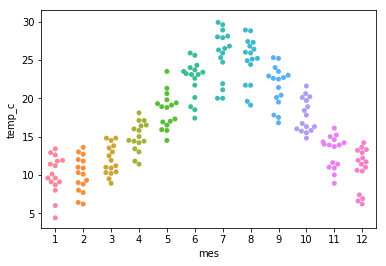

In [258]:
# Cargamos las librerias NumPy y Pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Cargamos Matplotlib y Seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos nuestros datos meteorológicos
meteo_mes = pd.read_csv("../U09_datasets/meteo_mes_agg.csv", sep = ";")

# Vamos a ver ahora las temperaturas por mes
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes)

La operación para generar el gráfico es muy simple y fácil de entender. En este caso, `sns.swarmplot()` crea un gráfico de dispersión evitando que se solapen los puntos.

Seaborn nos proporciona gran variedad de gráficos para obtener la visualización más adecuada a cada tipo de dato o análisis.

### Descubriendo la distribución de los datos

Una de las primeras cosas que hacemos al ponernos a trabajar con un nuevo conjunto de datos es examinar distintas medidas descriptivas de la distribución, como la media, la desviación típica, los mínimos y máximos, etc. 

Igualmente, a la hora de examinar gráficamente nuestros datos, comenzaremos por visualizar su distribución. Esto lo hacemos con `sns.distplot()`.

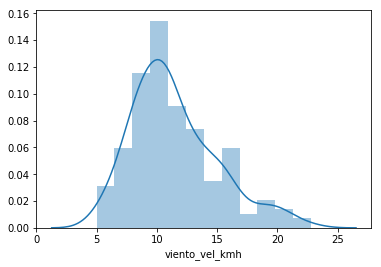

In [259]:
sns.distplot(meteo_mes['viento_vel_kmh'])

El gráfico incluye por defecto el histograma y una estimación de la densidad (de probabilidad) de la distribución.

Podemos omitir el estimador de densidad con la opción '`kde = False`'. También podemos añadir marcadores para ver el número de observaciones de cada valor en el eje X con la opción '`rug = True`'.

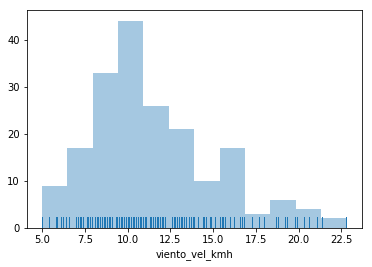

In [260]:
sns.distplot(meteo_mes['viento_vel_kmh'], kde=False, rug=True)

Otra forma de ver la distribución de una variable es mediante un diagrama de caja o _box plot_.

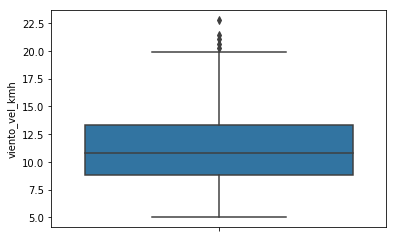

In [261]:
sns.boxplot(y='viento_vel_kmh', data=meteo_mes)

### Visualizando relaciones entre variables

Después de examinar las variables por separado, probablemente nos interesará ver si existen interacciones o dependencias entre dos variables. Cuando ambas variables son continuas, utilizamos un diagrama de dispersión (o _scatter plot_). En Seaborn podemos generarlo con `sns.jointplot()`.

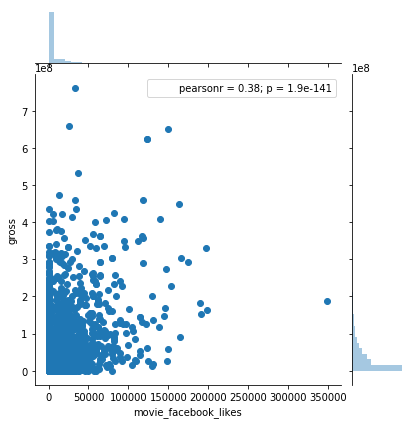

In [263]:
# Vamos a cargar datos de películas
movies = pd.read_csv("../../Datasets/imdb_movie.csv")

# Veamos si hay interacción entre el número de "likes" en facebook
# y los ingresos brutos de taquilla que consigue una película
sns.jointplot('movie_facebook_likes', 'gross', data = movies)

Este tipo de gráficos nos muestra la distribución conjunta del par de variables, junto con las distribuciones o histogramas marginales de cada variable independiente. Además, nos indica cuál es el coeficiente de Pearson para la correlación lineal entre las variables.

En este caso tenemos algunos valores muy extremos que distorsionan el análisis. Probemos a hacer una transformación de variables tomando logaritmos.

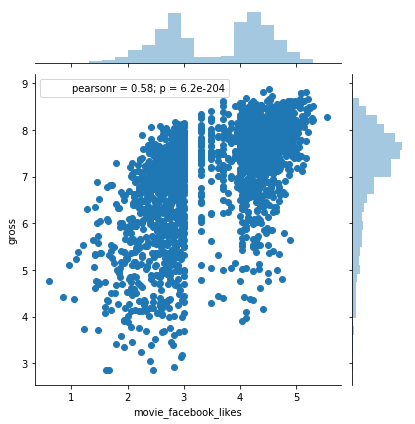

In [264]:
# vamos a quedarnos con las películas que tienen datos de "likes"
movies_fb = movies.loc[movies['movie_facebook_likes'] > 0, ['movie_facebook_likes','gross']]

# aplicamos `log10` a las variables antes de pintar
sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb))

Si lo preferimos, podemos mostrar densidades de probabilidad estimadas en lugar de las observaciones e histogramas.

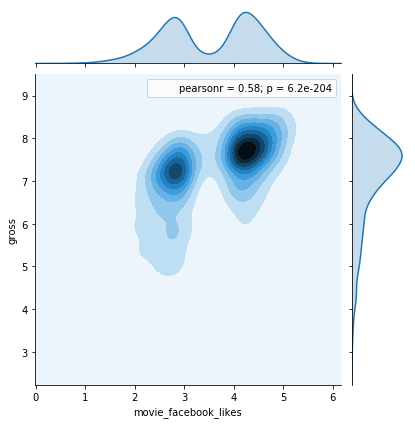

In [265]:
sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb), kind="kde")

Una vez que hemos identificado una posible interacción entre variables, podemos estimar y pintar un modelo ajustado a las observaciones.

Con `sns.regplot()`, además de mostrar los puntos para cada observación, también se ajusta un modelo de regresión lineal para `y ~ x` (`gross ~ movie_facebook_likes` en este ejemplo) y pinta la recta correspondiente al ajuste con el intervalo de confianza al 95%. Si preferimos omitir este ajuste lineal, basta con incluir la opción '`fit_reg=False`'.


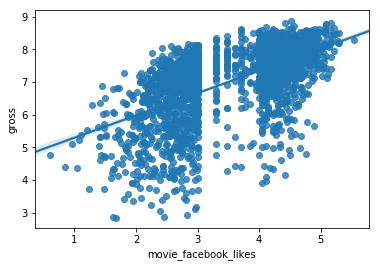

In [266]:
# aplicamos `log10` a las variables antes de pintar
sns.regplot('movie_facebook_likes', 'gross', 
            data = np.log10(movies_fb))

Ahora parece que tenemos una relación algo más evidente entre ambas variables.

Cuando queremos ajustar modelos entre dos variables también podemos usar la función `sns.lmplot()`. En realidad, `sns.regplot()` es una versión reducida de ésta. Con `sns.lmplot()` podemos controlar distintos parámetros del ajuste, tipo de modelo, emplear regresión robusta, etc.

### Comparando niveles o categorías

¿Y qué ocurre si trabajamos también con variables categóricas? En estos casos queremos ver cómo varía la respuesta (variable dependiente) en función del nivel o categoría.

En el primer ejemplo ya vimos una forma de representar observaciones de una variable continua en función de una categórica utilizando `sns.swarmplot()`. Veamos más opciones.


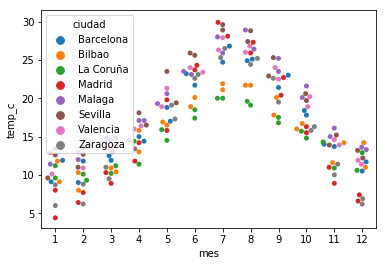

In [267]:
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes, hue='ciudad')

Hemos repetido el primer gráfico de temperaturas mensuales, pero ahora le hemos indicado que coloree los puntos en función de la ciudad (`hue='ciudad'`).

Igual que utilizamos un _box plot_ para ver la distribución de una variable, podemos ver la distribución por niveles o categorías.

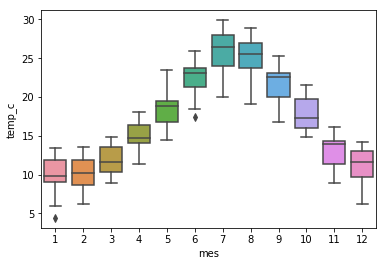

In [268]:
sns.boxplot(x='mes', y='temp_c', data=meteo_mes)

También podemos dividir por otra variable categórica usando '`hue`' de nuevo.

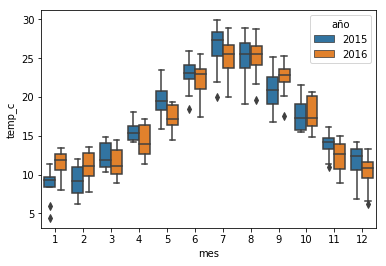

In [269]:
sns.boxplot(x='mes', y='temp_c', hue='año', data=meteo_mes)

Otra forma de ver la distribución de una variable dependiendo de distintos factores o categorías es mediante un gráfico de violín. En estos gráficos, en lugar de representar medidas de posición de la distribución, se muestra una estimación de la función de densidad.

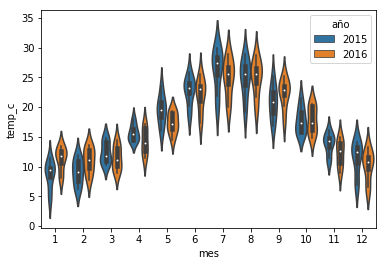

In [270]:
sns.violinplot(x='mes', y='temp_c', hue='año', data=meteo_mes)

En lugar de mostrar _violines_ independientes para cada categoría de color (_año_), podemos partir cada _violin_ y que cada mitad se aplique a un nivel, utilizando el argumento '`split=True`'.

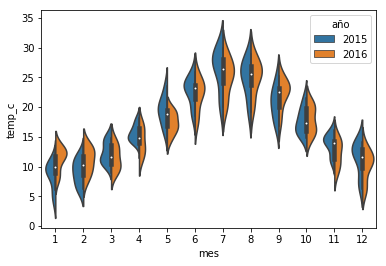

In [271]:
sns.violinplot(x='mes', y='temp_c', hue='año', split=True, data=meteo_mes)

Por último, otra forma de comparar valores entre categorías es utilizando gráficos de barras. Para ello tenemos la función `sns.barplot()`, que muestra un indicador agregado estadístico de las observaciones para cada categoría (por defecto calcula la media).

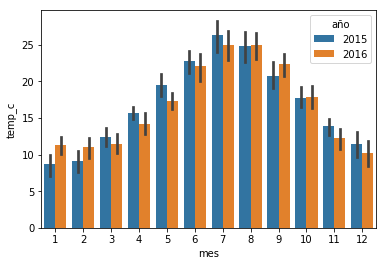

In [272]:
sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)

### _Facets_

Cuando tenemos que analizar y visualizar datos con varias dimensiones suele ser muy útil representar simultáneamente múltiples vistas de diferentes subconjuntos de datos y dimensiones, de forma que nos hagamos una mejor idea de la estructura conjunta de los datos y sus relaciones.

Para ello utilizamos gráficos múltiples organizados en cuadrículas o rejillas. En Seaborn esta organización de gráficos se consigue mediante un objeto `sns.FacetGrid`.

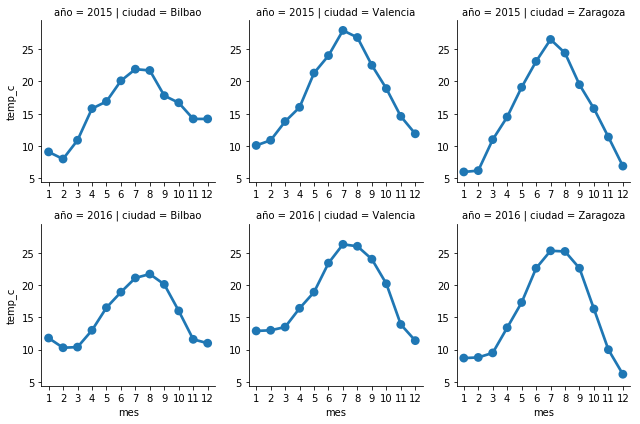

In [273]:
# Vamos a seleccionar datos de unas pocas ciudades
meteo_bvz = meteo_mes[meteo_mes['ciudad'].isin(['Bilbao','Valencia','Zaragoza'])]

# Pintar una rejilla con tantas filas como años
# y tantas columnas como ciudades;
# en cada panel incluir un gráfico de puntos 
# de temperatura por mes
sns.FacetGrid(meteo_bvz, row='año', col='ciudad').map(sns.pointplot, "mes", "temp_c")

Con `sns.FacetGrid` hemos definido una rejilla con tantas filas como años y tantas columnas como ciudades. Sobre cada celda del grid construido, aplicamos (con `map`) la función gráfica que queremos representar; en este caso un gráfico de puntos (`sns.pointplot`) de temperatura por cada mes.

Si pintas directamente el objeto `sns.FacetGrid`, te mostrará la rejilla con las celdas sin datos.

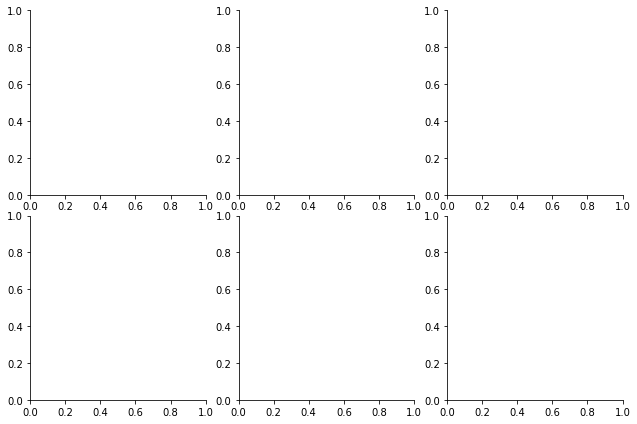

In [274]:
sns.FacetGrid(meteo_bvz, row='año', col='ciudad')

Podemos utilizar el color (o la forma de los puntos) para representar dimensiones adicionales de los datos.

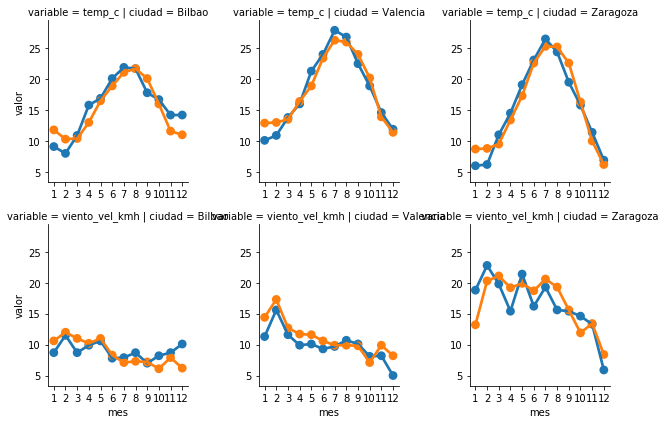

In [275]:
# Usamos `pd.melt` para pasar de datos en modo 'ancho'
# a modo 'largo' o apilado.
meteo_bvz_long = pd.melt(meteo_bvz, 
                         id_vars=['año','mes','ciudad'], 
                         value_vars=['temp_c','viento_vel_kmh'], 
                         var_name='variable', value_name='valor')

# Ahora en cada fila de la rejilla representamos una variable meteo
# y con el color representamos el año
sns.FacetGrid(meteo_bvz_long, row='variable', col='ciudad', hue='año').map(sns.pointplot, 'mes', 'valor')

### Ajustando los gráficos

Para terminar, un punto importante a la hora de comunicar con nuestros gráficos es que sean fáciles de interpretar y que la estética sea adecuada para visualizar la información. Seaborn ofrece varias opciones para completar y mejorar la presentación de nuestros gráficos de forma sencilla.

Los objetos gráficos que devuelven las funciones de Seaborn constan a su vez de dos partes, un objeto que representa los ejes (`axes`) y otro objeto que representa la figura (`figure`). Podremos modificar propiedades del gráfico a través de estos objetos.

#### Estilos y temas

Seaborn incluye cinco temas gráficos predefinidos con distintas configuraciones de estilos para usar directamente con nuestras figuras. En la siguiente tabla tienes el listado de temas.

| Tema gráfico |
|:------------:|
| `darkgrid`   |
| `whitegrid`  |
| `dark`       |
| `white`      |
| `ticks`      |

Estos temas ajustan elementos gráficos como el color de fondo, líneas de guía, ejes y marcas, leyenda, etc. Para especificar qué tema queremos aplicar, empleamos la función `sns.set_style()`.

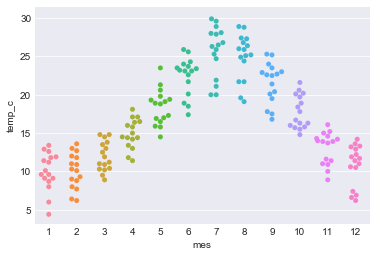

In [276]:
sns.set_style('darkgrid')
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes)

Sobre un tema podemos introducir nuestros propios ajustes. La función `sns.set_style()` admite que le pasemos un diccionario con nuestras configuraciones de elementos particulares del gráfico.

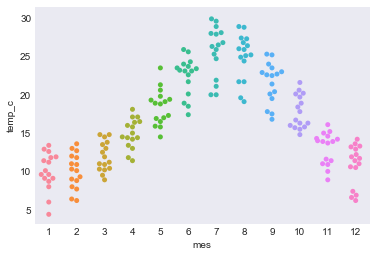

In [277]:
sns.set_style('darkgrid', 
              rc = {'axes.grid': False})
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes)

Puedes consultar la configuración actual con `sns.axes_style()`.

In [278]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

#### Tamaño de la figura

Dependiendo del contexto en el que vayamos a integrar nuestras gráficas necesitaremos ajustar su tamaño. Una forma de hacerlo es mediante `set_size_inches()`.

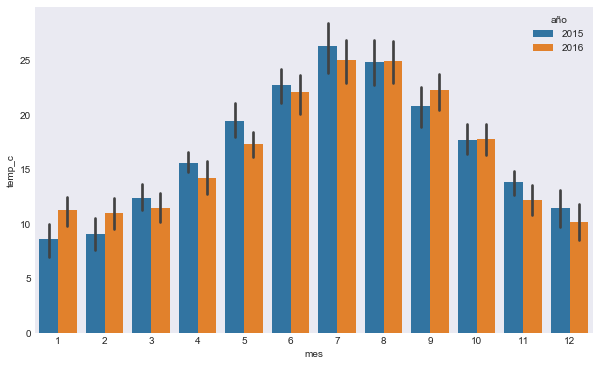

In [279]:
sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes).figure.set_size_inches(10,6)

#### Colores

Seaborn también nos permite configurar la paleta de colores que queremos aplicar a nuestros gráficos. Dependiendo del tipo de variables que vayamos a representar, se adaptarán mejor unas paletas u otras.

Para seleccionar la paleta de colores usaremos la función `sns.color_palette()` o alguna de sus derivadas.

##### Variables categóricas

Para pintar variables cualitativas o de valores discretos, las paletas más comunes son `"hsl"` y `"husl"`, que tratan de diferenciar al máximo el tono (_hue_) para cada categoría.

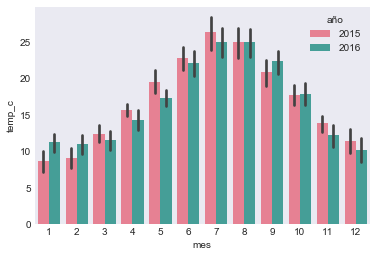

In [280]:
# Seleccionar dos colores de la paleta "husl"
with sns.color_palette("husl", 2): 
    sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)

También podemos definir nosotros mismos los colores a utilizar manualmente con `sns.xkcd_palette()`.

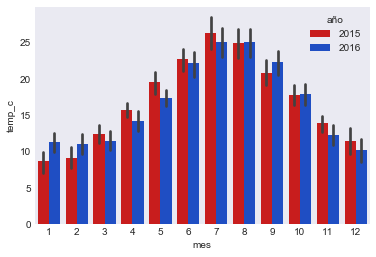

In [281]:
with sns.xkcd_palette(["red","blue"]): 
    sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)

##### Variables continuas

Si vamos a mostrar una variable continua, nos interesan paletas que varíen el color de forma gradual, ya sea por tono, luminosidad, saturación, etc.

La función `sns.light_palette()` crea una escala a partir de un color base, graduando la saturación.

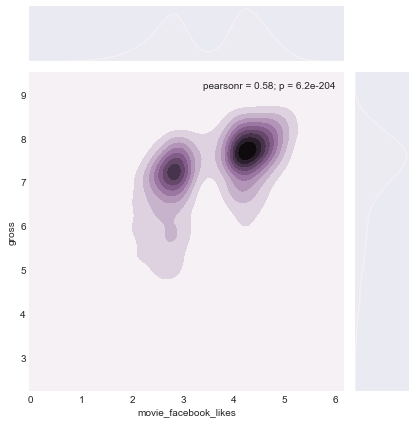

In [282]:
with sns.light_palette("muted purple", input="xkcd"):
    sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb), kind="kde")

Si queremos incrementar el contraste, podemos usar `sns.cubehelix_palette()`. Esta función crea una paleta graduando el tono y el brillo.

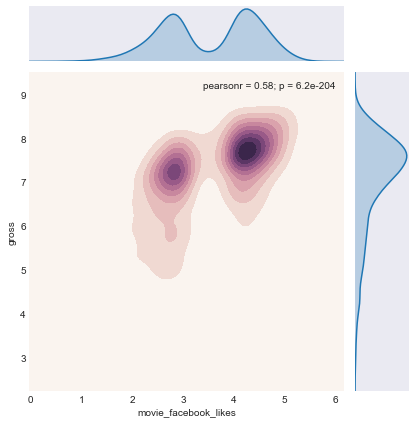

In [283]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb), kind="kde", cmap=cmap)

#### Títulos

Para fijar el título de una gráfica simple, utilizamos el método `set_title()`.

Text(0.5,1,'Temperaturas mensuales observadas')

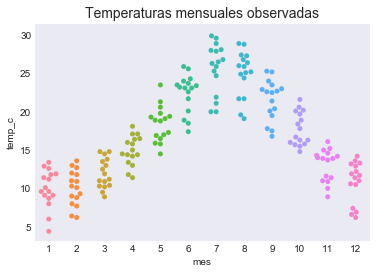

In [284]:
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes).set_title("Temperaturas mensuales observadas", fontsize=14)

#### Ejes

Igualmente, si queremos modificar las etiquetas de cada uno de los ejes, utilizamos el método `set()`, indicando los valores para `xlabel` e `ylabel`.

[Text(0,0.5,'Temperatura (ºC)'), Text(0.5,0,'Mes')]

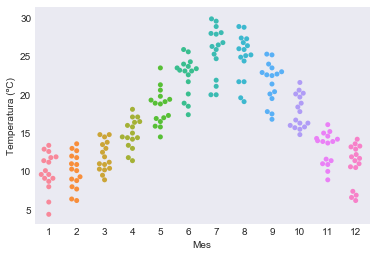

In [285]:
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes).set(xlabel="Mes", ylabel="Temperatura (ºC)")

### Para saber más

#### Sobre Seaborn

- https://seaborn.pydata.org/index.html
- https://seaborn.pydata.org/api.html

#### Otras librerías
- Matplotlib: https://matplotlib.org/users/pyplot_tutorial.html
- ggplot: http://blog.yhat.com/posts/facebook-ggplot-tutorial.html

# Modelos estadísticos: statsmodel

Statsmodels es una librería para Python especializada en la exploración, estimación y evaluación de modelos, ajuste de parámetros y realización de tests estadísticos sobre conjuntos de datos y distribuciones. 

Statsmodels está construido sobre la base de NumPy, y se integra con las estructuras de datos de Pandas. Además, incluye la posibilidad de definir modelos siguiendo la sintaxis de fórmulas de R, lo que facilita la transición para los usuarios de este lenguaje.

### Modelos lineales

Vamos a repasar algunos modelos que viste en la Unidad 7 de regresión lineal, mostrándote ejemplos de cómo hacerlo en Python. con Statsmodels

#### Modelo lineal simple

Comenzemos con el modelo más simple, que asume que la variable respuesta depende linealmente de una variable explicativa.

$$ Y = \beta_0 + \beta_1 X + \epsilon $$

Reutilizaremos el conjunto de datos de gasto en publicidad en TV, radio y prensa, y ventas conseguidas de producto que empleamos en la Unidad 7.


In [286]:
# Cargamos las librerias NumPy y Pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Cargamos Matplotlib y Seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos de gasto en publicidad
ads = pd.read_csv("../../Datasets/advertising.csv", sep = ";")


Revisamos gráficamente la estructura de los datos.

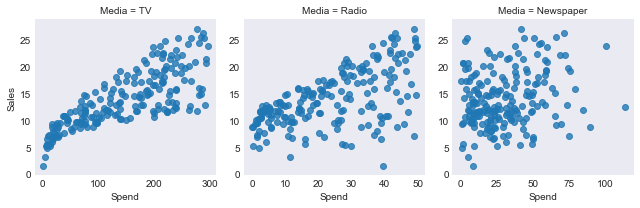

In [287]:
# Nos preparamos los datos de forma que sea más fácil pintarlos
ads_m = ads.melt(id_vars='Sales', value_vars=['TV','Radio','Newspaper'], var_name='Media', value_name='Spend')

# Representamos en una rejilla las ventas según gasto en cada medio
sns.FacetGrid(ads_m, col='Media', sharex=False).map(sns.regplot, 'Spend', 'Sales', fit_reg=False)

Para este primer ejemplo, intentamos explicar las ventas a partir del gasto en publicidad en TV.

Vamos a definir el modelo y realizar el ajuste de coeficientes por mínimos cuadrados con Statsmodels.

In [288]:
import statsmodels.api as sm

# Definimos un modelo y ~ b0 + b1*X + e

# Vector respuesta
y = ads['Sales']
# Matriz de variables explicativas del modelo
X = ads['TV']
# Añadimos un término constante a la matriz del modelo (b0)
X = sm.add_constant(X, prepend=False)

# Construimos el objeto modelo
# usamos un modelo lineal tipo OLS
# (Ordinary Least Squares)
model = sm.OLS(y, X)

# Ajustamos los parámetros del modelo (b0, b1)
mfitted = model.fit()

# Veamos el resumen del modelo ajustado
print(mfitted.summary())


C:\Users\rubmor\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        19:10:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0475      0.003     17.668      0.0

El código no es nada complejo. No obstante, repasemos los pasos, ya que la mecánica es común para cualquier tipo de modelo que queramos utilizar.

En primer lugar tenemos que definir el modelo. En Statsmodels la forma básica de definir un modelo es construyendo el vector respuesta y la matriz de variables explicativas o matriz de regresión. 

La variable respuesta (o endógena en terminología de Statsmodels) la pasaremos como un array o serie de _N_ observaciones. En este ejemplo, construimos el vector respuesta `y` a partir de los datos de ventas.

Las variables explicativas (o exógenas) las pasamos como un array o matriz _(N x k)_, donde _N_ es el número de observaciones (filas) y _k_ es el número de variables explicativas independientes que forman el modelo. A esta matriz se la conoce como matriz del modelo o matriz de diseño. En este ejemplo, construimos la matriz exógena `X` a partir del gasto en TV.

Esta forma de definir un modelo mediante su matriz requiere que añadamos explícitamente un término constante para ajustar el coeficiente $\beta_0$, correspondiente a la ordenada en el origen o _intercept_. Podemos hacer esto facilmente con `sm.add_constant()`.

Una vez que tenemos la matriz del modelo y el vector respuesta, podemos crear el modelo. En este caso utilizamos `sm.OLS`. Esta clase implementa una regresión lineal por mínimos cuadrados, la técnica más común.

Después de crear modelo, estimamos los coeficientes que mejor se ajustan a la muestra de datos mediante el método `fit()` del modelo.

Con el modelo ajustado, podemos examinar algunos indicadores y parámetros del ajuste con `summary()`.

Statsmodels también incluye una API (`statsmodels.api.graphics`) con varias funciones para generar distintos gráficos muy útiles para analizar y validar nuestros modelos, como gráficos de correlación, de bondad del ajuste o de análisis de regresores.

Vamos a pintar un gráfico con los valores estimados por nuestro modelo frente a los valores observados.

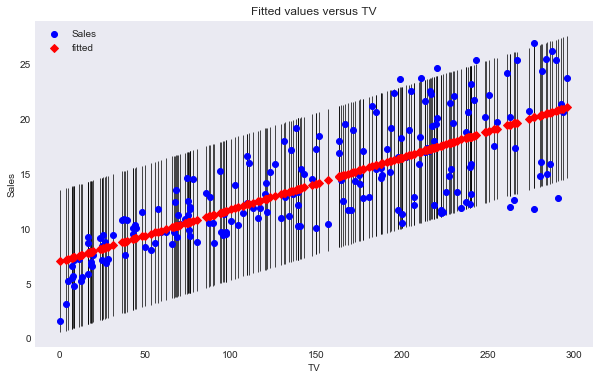

In [289]:
fig = plt.figure()
fig = sm.graphics.plot_fit(mfitted, "TV").set_size_inches(10, 6)

Finalmente, con nuestro modelo ajustado ya podemos hacer estimaciones para nuevos datos de entrada, empleando el método `predict()`.

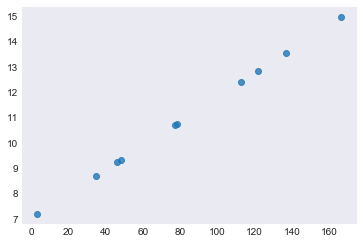

In [290]:
# Generamos unos cuantos valores aleatorios
# para el gasto en TV
nuevas_obs = np.random.uniform(low=0, high=200, size=10)
# Añadimos la constante
nuevas_obs = sm.add_constant(nuevas_obs, prepend=False)

# Predecir la respuesta
y_pred = mfitted.predict(nuevas_obs)

# Nos pintamos las variables de gasto (X)
# y ventas estimadas (y_pred)
sns.regplot(x=nuevas_obs[:,0], y=y_pred, fit_reg=False)

#### Regresión lineal múltiple

Al explicarte cómo preparar la matriz de diseño del modelo ya te hemos adelantado que podemos incluir todas las variables explicativas que deseemos. No va a existir ninguna diferencia a nivel de las operaciones a realizar.

Para demostrarlo, ajustemos un modelo para las ventas utilizando como predictores el gasto de publicidad en cada medio:

$$ Sales = \beta_0 + \beta_1 TV + \beta_2 Radio + \beta_3 Newspaper + \epsilon $$


In [291]:
# Vector respuesta
y = ads['Sales']
# Matriz de variables explicativas del modelo
X = ads[['TV','Radio','Newspaper']]
# Añadimos un término constante a la matriz del modelo (b0)
X = sm.add_constant(X, prepend=False)

# Construimos el objeto modelo
# usamos un modelo lineal tipo OLS
# (Ordinary Least Squares)
model_mlin = sm.OLS(y, X)

# Ajustamos los parámetros del modelo
mlin_fitted = model_mlin.fit()

# Veamos el resumen del modelo ajustado
print(mlin_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        19:10:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.0

En modelos con múltiples predictores nos interesa ver relación parcial entre la variable respuesta y cada variable explicativa por separado, descontando el efecto de las demás variables exógenas. Statsmodels también nos facilita este análisis de forma gráfica.

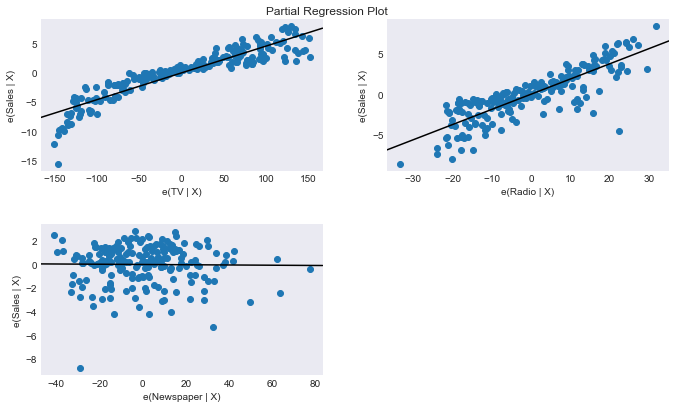

In [292]:
fig = plt.figure()
fig = sm.graphics.plot_partregress_grid(mlin_fitted, ['TV','Radio','Newspaper']).set_size_inches(10, 6)

### Definiendo modelos con fórmulas

Definir un modelo mediante una matriz de diseño con las variables explicativas no es especialmente complicado. Sobre todo en Statsmodels, que admite que usemos las columnas de un DataFrame de Pandas directamente.

Sin embargo, trabajar con matrices de modelo cuando quieres probar distintas variantes (quitando o añadiendo variables, considerando interacciones o transformaciones de variables) puede resultar más engorroso; tendremos que andar preparando una nueva matriz para cada alternativa a explorar.

Afortunadamente, Statsmodels ha incluido desde hace algún tiempo la capacidad de definir un modelo mediante fórmulas, siguiendo la sintaxis que ya conoces del lenguaje R.


In [293]:
# Cargamos la API con soporte a formulas
import statsmodels.formula.api as smf

# Definimos el modelo usando una formula como en R
model_f = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data=ads)

# Ajustamos el modelo
mf_fitted = model_f.fit()

# Resumen
print(mf_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        19:11:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Como cabía esperar, los resultados del ajuste son los mismos. En realidad el modelo subyacente no cambia, sólo el mecanismo que hemos usado para definirlo.

Aparte de la sencillez de uso, tener la definición del modelo de forma textual aporta legibilidad. Es más fácil y rápido interpretar un modelo mediante su formulación que revisando la matriz de diseño.

> **Importante**. Si has revisado con atención el modelo y los resultados, tal vez ya te hayas dado cuenta de un cambio sutil al usar una fórmula. No hemos tenido que añadir un término constante explícito como ocurre con las matrices. La API para fórmulas lo hace por nosotros de forma automática (en línea con el funcionamiento en R).

#### Interacciones entre variables

Si el fenómeno que estamos modelando cumple que cuando todas las variables explicativas valen cero, entonces la respuesta es cero, podemos eliminar del ajuste el término constante o _intercept_. Eliminar un término se consigue simplemente restando en la fórmula. En nuestro ejemplo, la fórmula pasaría a ser

  `Sales ~ TV + Radio + Newspaper - 1`

Las interacciones entre variables se incluyen en las fórmulas igual que en R.

| Fórmula | Descripción |
|:--------|:------------|
| Y ~ X\*Z | Añadir la interacción entre las vars. X y Z. Equivalente a $Y = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3 (X*Z)$ |
| Y ~ X:Z | Incluir solo la interacción entre las vars. X y Z. Equivalente a $Y = \beta_0 + \beta_3 (X*Z)$ |

#### Variables categóricas

Statsmodels también soporta el uso de variables categóricas en las fórmulas. La librería se encarga de hacer las transformaciones automáticas para añadir las variables _dummy_ necesarias por cada nivel.

Además, si tenemos una variable entera que queremos tratar como una variable categórica, basta con utilizar el operador `C()` con dicha variable en la fórmula.


In [294]:
# Creamos una variable categórica 
# ¿el gasto en TV es bajo, medio o alto?
ads['TV_budget'] = pd.qcut(ads['TV'], [0, 0.15, 0.85, 1], labels=['LOW','MID','HIGH'])

# Creamos una variable entera
# 0 si hay más gasto en TV que en el resto
# 1 en caso contrario
ads['More_Radio_Or_News'] = ads.apply(lambda x: int(x['TV'] < x['Radio'] + x['Newspaper']), axis="columns")

# Definimos un modelo usando variables categóricas
model_c = smf.ols(formula = 'Sales ~ TV_budget + C(More_Radio_Or_News)', data=ads)

mc_fitted = model_c.fit()

print(mc_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     52.79
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.69e-25
Time:                        19:11:45   Log-Likelihood:                -554.46
No. Observations:                 200   AIC:                             1117.
Df Residuals:                     196   BIC:                             1130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Transformaciones. Funciones en fórmulas.

Cuando observemos que existen relaciones no lineales entre variables, podemos embeber funciones para transformar las variables predictoras involucradas en nuestras fórmulas. El intérprete de fórmulas se encargará internamente de aplicar dichas funciones. Los únicos requisitos son que se trate de funciones vectorizadas, preparadas para operar sobre objetos tipo arrays o Series (como las funciones de NumPy); y además que las funciones sean accesibles en el contexto o espacio de nombres actual.

In [295]:
# Definimos un modelo usando la raiz cuadrada del gasto en TV
# como predictor
model_fn = smf.ols(formula = 'Sales ~ np.sqrt(TV)', data=ads)

mfn_fitted = model_fn.fit()

print(mfn_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.39e-44
Time:                        19:11:51   Log-Likelihood:                -516.16
No. Observations:                 200   AIC:                             1036.
Df Residuals:                     198   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6724      0.667      4.004      

### Clasificación. Regresión logística.

Otro tipo de problema típico a resolver con modelos estadísticos es el de clasificación. De la unidad 8 recordarás que el problema aquí consiste en estimar la categoría más probable a la que pertenece un elemento en función de una serie de características observadas, que utilizamos como variables explicativas del modelo.

Existen varias técnicas de clasificación estadística. Pero ahora vamos a centrarnos en la regresión logística. 

Statsmodels incluye métodos y utilizades específicas para regresión logística. La interfaz principal es `sm.Logit()`. Como vas a ver, su uso no puede ser más sencillo.

Vamos a reutilizar el ejemplo de la unidad 8 para intentar determinar el sexo de una persona en función de varias medidas antropométricas.

In [ ]:
import sys
import os.path

# Tan solo modifica la cadena de texto entre comillas
# de DIR_FICHEROS_CURSO
# Sustituye por la ruta completa hasta el directorio base
# donde descargues el material del campus
DIR_FICHEROS_CURSO = "."
DIR_U09 = os.path.join(DIR_FICHEROS_CURSO, "09PythonParaAnalisisDatos")
DIR_U09_SRC = os.path.join(DIR_U09, "U09_src")

sys.path.append(DIR_U09_SRC)

In [296]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

body = pd.read_csv("../../Datasets/body_measures_subset.csv", delimiter=";")

# Los datos contienen varias medidas antropométricas
# `Gender` es una variable categórica
#  - 0 : mujer
#  - 1 : hombre
body.head()

,Gender,Ankle_min_girth,Wrist_min_girth,Height,Weight,Chest_depth,Biacromial_diameter
0,1,23.5,16.5,174.0,65.6,17.7,42.9
1,1,24.5,17.0,175.3,71.8,16.9,43.7
2,1,21.9,16.9,193.5,80.7,20.9,40.1
3,1,23.0,16.6,186.5,72.6,18.4,44.3
4,1,24.4,18.0,187.2,78.8,21.5,42.5


In [298]:
# Variable respuesta
y = body['Gender']
# Las variables predictoras son todas las demás
X = body.iloc[:,1:]
# Añadimos el término constante
X = sm.add_constant(X, prepend=False)

# Construimos el modelo logístico
model = smf.Logit(y, X)
# Y ajustamos
mfitted = model.fit()

Optimization terminated successfully.
         Current function value: 0.154336
         Iterations 9


In [306]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [310]:
# Examinamos los resultados del ajuste
print(mfitted.summary())

                           Logit Regression Results                           
Dep. Variable:                 Gender   No. Observations:                  507
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:                  0.7772
Time:                        19:20:41   Log-Likelihood:                -78.248
converged:                       True   LL-Null:                       -351.26
                                        LLR p-value:                1.018e-114
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Ankle_min_girth        -0.4816      0.235     -2.050      0.040      -0.942      -0.021
Wrist_min_girth         2.6984      0.444      6.075      0.000       1.828       3.569
Height          

Podemos ver la matriz de confusión del ajuste con el método `pred_table()`. Las filas corresponden a las observaciones (0 y 1) de la variable respuesta, mientras que las columnas corresponden a los valores estimados por el modelo ajustado sobre los datos de entrenamiento. La diagonal recoge los casos correctos.

In [311]:
print(mfitted.pred_table())

[[246.  14.]
 [ 16. 231.]]


Pero naturalmente, lo importante son los resultados sobre datos distintos de los usados para entrenar. Vamos a dividir los datos originales en dos, un conjunto de entrenamiento y otro de test, y procedamos de nuevo.

In [312]:
# Creamos el conjunto de entrenamiento
# tomando aleatoriamente el 80% de filas
body_train = body.copy().sample(frac=0.8)
# El conjunto de test es el formado
# por el resto de filas
body_test = body.copy().drop(body_train.index)

# Variable respuesta
y_train = body_train['Gender']
y_test = body_test['Gender']
# Las variables predictoras son todas las demás
X_train = body_train.iloc[:,1:]
X_test = body_test.iloc[:,1:]
# Añadimos el término constante
X_train = sm.add_constant(X_train, prepend=False)
X_test = sm.add_constant(X_test, prepend=False)

# Construimos el modelo logístico
model = smf.Logit(y_train, X_train)
# Y ajustamos
mfitted = model.fit()


Optimization terminated successfully.
         Current function value: 0.135222
         Iterations 9


Ahora realizamos la predicción sobre el conjunto de test.

In [313]:
pred = mfitted.predict(X_test)
pred.head()

1     0.983750
4     0.999973
8     0.986980
14    0.993570
27    0.998867
dtype: float64

Los valores de la predicción para cada individuo están en el rango [0, 1]. Interpretando los resultados como _Prob(y = 1)_, tomamos que valores (p >= 0.5) corresponden a la categoría 1. Calculemos la tabla de confusión.

In [314]:
pred_0_1 = [ 1 if p >= 0.5 else 0 for p in pred ]

pd.crosstab(index=y_test, columns=pd.Categorical(pred_0_1), rownames=['Obs'], colnames=['Pred'])

Pred,0,1
Obs,,
0,46,6
1,2,47


Y por último, calculemos el acierto global.

In [315]:
acierto_total = np.mean(y_test == pred_0_1)
print ('acierto_total = {0}%'.format(np.round(acierto_total*100, 2))  )


acierto_total = 92.08%
